Twitter is one of the biggest social media platforms of our time. In twitter, one can find from the thoughts of their favorite celebrities to the policies of their government. In short, twitter is one of the major ways to connect with people of every field. There are many twitter accounts which tweet many wise things reelated to self improvement there. In these kernels, I am going to analyse more than 30K+ tweets from 40 different such acccounts. Let's move forward and see what we can find. 

I have scrapped tweets of mainly these twitter handles:

@naval, @Via_Benjamin, @RortyWitt, @EdLatimore, @StoopToRise, @AymPlanet, @Wealth_Theory, @alanhliang, @TradingNirvana, @modestproposal1, CrazyPolymath, @SentientBonobo, @webdevMason, @stoic_dilettant, @AJA_Cortes, @martyrmade, @PresentWitness_, @millstoic, @z3nblack, @TheChuChu_, @orangebook_, @yawyr_vk, @Noahpinion, @ThomasSowell, @LifeMathMoney, @DejaRu22, @lawsofaurelius, @48_quotes, @shl, @cryptoseneca, @paulg, @TheCreativeFury, @Kpaxs, @TheAncientSage, @DeeperThrill, @mmay3r, @DrRalphNap, @TheStoicEmperor, @uncannyinsights

There are other authors also in the dataset because one of the above mentioned account retweeted their tweets. 

You can find the script I wrote for scrapping all these tweets [here](https://github.com/Hsankesara/Tweets-Scrapper). You can also find the same dataset at Github. [Click here](https://github.com/Hsankesara/The-Tweets-of-Wisdom) to go there. 
Let's get started....

# Introduction
* Describe the data
* Understanding each column
* Removing NAN

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/the-tweets-of-wisdom/tweets.csv


In [2]:
df = pd.read_csv('../input/the-tweets-of-wisdom/tweets.csv')

In [3]:
df.head()

author_name           created_at handle  likes  retweets  \
0       Naval  2019-08-07 22:36:56  naval   7566      1498   
1       Naval  2019-08-07 05:00:38  naval  21886      5984   
2       Naval  2019-08-07 04:52:33  naval   6462      1266   
3       Naval  2019-08-06 08:35:26  naval    466        61   
4       Naval  2019-08-06 07:33:20  naval   3971       906   

                                       tweet_content  
0  Unresolved thoughts, prematurely pushed out of...  
1  The modern mind is overstimulated and the mode...  
2  The Lindy Effect for startups:\n\nThe longer y...  
3               @orangebook_ This was a good tweet.   
4  Social media lowers the cost of raising &amp; ...

In [4]:
df.describe()

likes       retweets
count  3.111500e+04   31115.000000
mean   1.044935e+03     342.258236
std    1.221500e+04    3887.307426
min    0.000000e+00       0.000000
25%    1.400000e+01       2.000000
50%    6.900000e+01      13.000000
75%    2.850000e+02      65.000000
max    1.352225e+06  424270.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31115 entries, 0 to 31114
Data columns (total 6 columns):
author_name      31114 non-null object
created_at       31115 non-null object
handle           31115 non-null object
likes            31115 non-null int64
retweets         31115 non-null int64
tweet_content    30754 non-null object
dtypes: int64(2), object(4)
memory usage: 1.4+ MB


In [6]:
df.isna().any()

author_name       True
created_at       False
handle           False
likes            False
retweets         False
tweet_content     True
dtype: bool

In [7]:
df[df.tweet_content.isna()]

author_name           created_at          handle  likes  \
220                     Naval  2019-01-28 04:54:10           naval    923   
224    Steve Stewart-Williams  2019-01-26 12:49:14    SteveStuWill   1744   
298                     Naval  2018-12-25 00:30:06           naval   1363   
319                Sam Harris  2018-12-17 03:21:41    SamHarrisOrg  30902   
368             Noah Ruderman  2018-11-18 04:00:00  devilscompiler    205   
...                       ...                  ...             ...    ...   
28367                 Michael  2017-12-29 11:35:41          mmay3r    104   
28585                 Michael  2019-09-22 03:04:01          mmay3r    242   
28592            Kevin Simler  2019-09-14 02:20:26     KevinSimler    464   
28650                 Michael  2019-07-01 22:53:15          mmay3r    116   
28955        Ralph Napolitano  2019-07-21 19:36:41      DrRalphNap      5   

       retweets tweet_content  
220         189           NaN  
224         565           NaN  
298         224           NaN  
319        5840           NaN  
368          44           NaN  
...         ...           ...  
28367        34           NaN  
28585        45           NaN  
28592        92           NaN  
28650         6           NaN  
28955         2           NaN  

[361 rows x 6 columns]

In [8]:
df[df.author_name.isna()]

author_name           created_at        handle  likes  retweets  \
423         NaN  2018-10-13 18:46:36  biodysphoria    181        35   

                                         tweet_content  
423  People Who Don’t Get It explore cuisine\n\nPeo...

** These tweets are NaN because the author has posted only an image. I'll remove them as they has no significance at all in my analysis. **


** Only one tweet has an author with NaN. Gonna drop it also **

In [9]:
df = df.dropna()

In [10]:
df.isna().any()

author_name      False
created_at       False
handle           False
likes            False
retweets         False
tweet_content    False
dtype: bool

# Understanding the Author, Likes and Retweets
* How much likes and retweets are related. 
* Value count of tweets of each author. 
* Do more tweets increase the mean likes an author got?
* Variation of likes for each author.
* Definition of a "viral" tweet. 

In [11]:
print(len(df.author_name.unique()))

2754


In [12]:
df.handle.value_counts().head(10)

ThomasSowell      1909
TheAncientSage    1678
orangebook_       1661
Kpaxs             1314
TradingNirvana    1208
cryptoseneca      1172
LifeMathMoney     1048
AJA_Cortes         955
millstoic          915
TheChuChu_         885
Name: handle, dtype: int64

In [13]:
# let's take top 10 authors
top_ten_authors = df.handle.value_counts().head(10).index

In [14]:
top_ten_authors

Index(['ThomasSowell', 'TheAncientSage', 'orangebook_', 'Kpaxs',
       'TradingNirvana', 'cryptoseneca', 'LifeMathMoney', 'AJA_Cortes',
       'millstoic', 'TheChuChu_'],
      dtype='object')

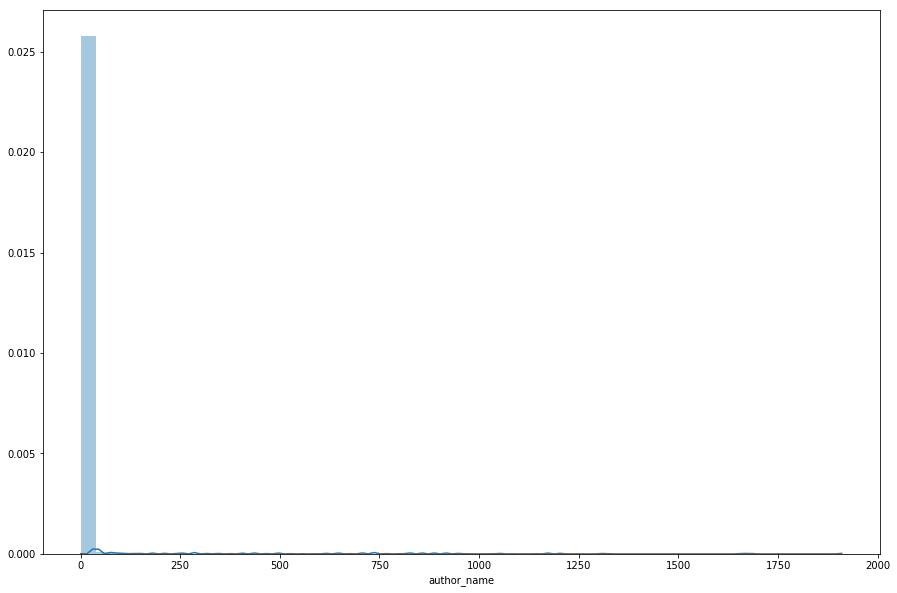

In [15]:
plt.figure(figsize=(15,10))
sns.distplot(df.author_name.value_counts())

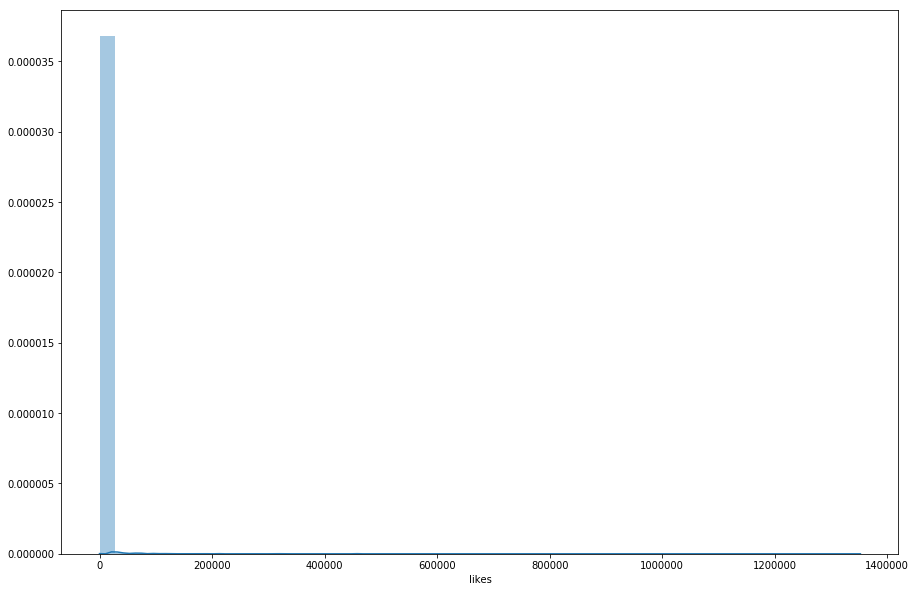

In [16]:
plt.figure(figsize=(15,10))
sns.distplot(df.likes)

4273.700890518596 5948.401298806228


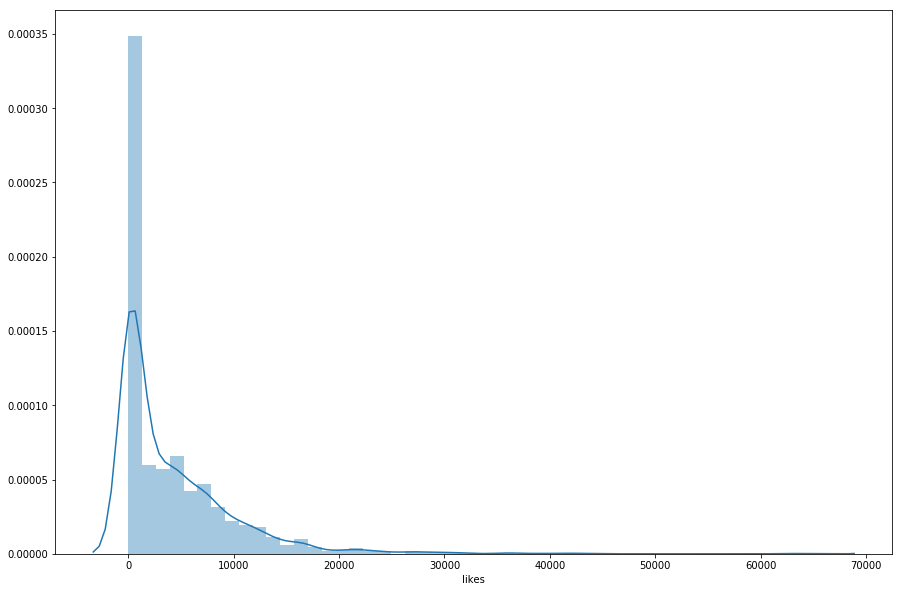

In [17]:
plt.figure(figsize=(15,10))
print(df[df['author_name'] == 'Thomas Sowell'].likes.mean(), df[df['author_name'] == 'Thomas Sowell'].likes.std())
sns.distplot(df[df['author_name'] == 'Thomas Sowell'].likes)

1745.473022524882 2292.7124881646396


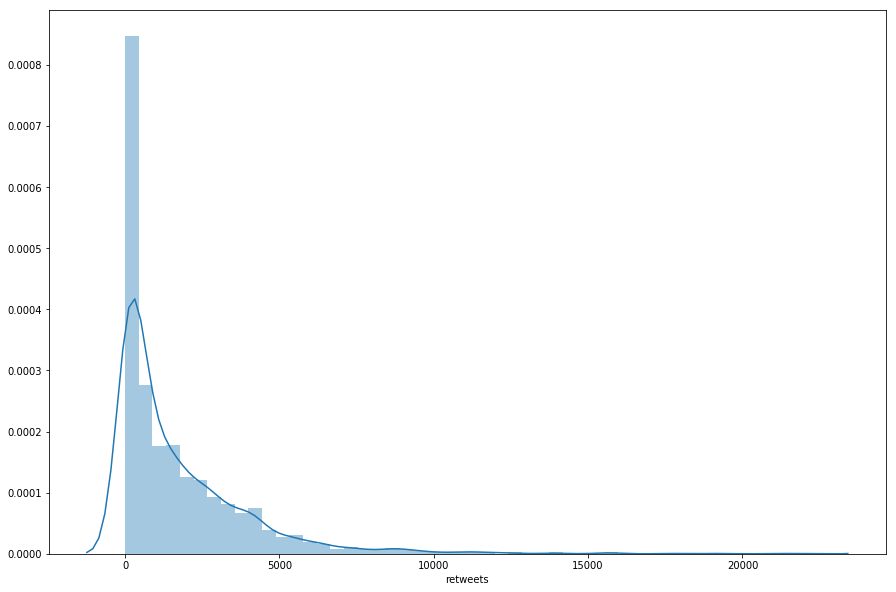

In [18]:
plt.figure(figsize=(15,10))
print(df[df['author_name'] == 'Thomas Sowell'].retweets.mean(), df[df['author_name'] == 'Thomas Sowell'].retweets.std())
sns.distplot(df[df['author_name'] == 'Thomas Sowell'].retweets)

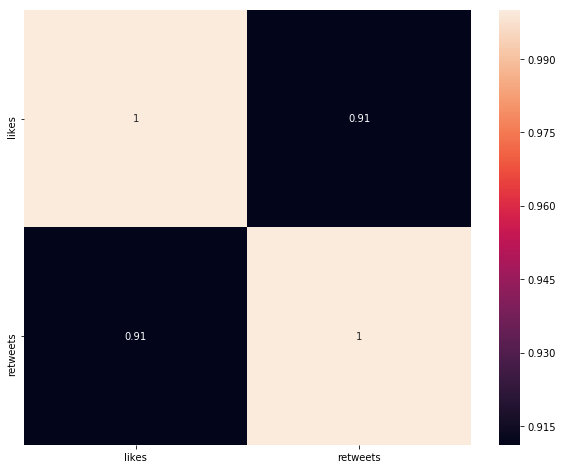

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['likes', 'retweets']].corr(), annot=True)

** High Correlation between number of Retweets and likes which is expected **

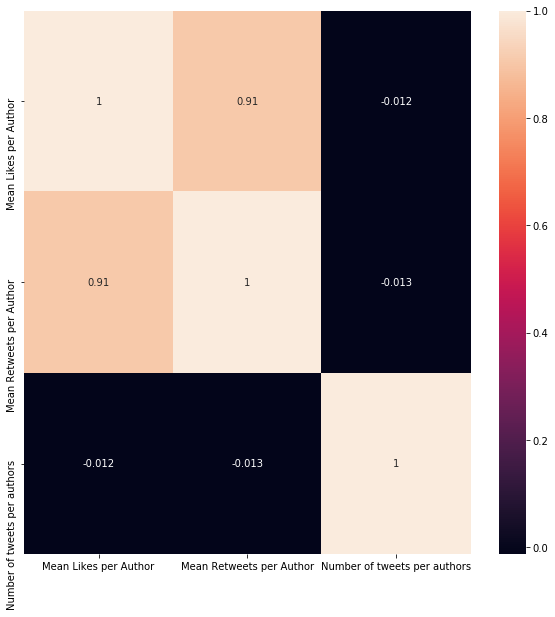

In [20]:
plt.figure(figsize=(10,10))
p  = pd.concat([df.groupby('handle').likes.mean(), df.groupby('handle').retweets.mean(), df.groupby('handle').likes.count()], axis=1 )
p.columns = ['Mean Likes per Author', 'Mean Retweets per Author' ,'Number of tweets per authors']
sns.heatmap(p.corr() ,annot=True)

**Negligible Correlation between likes and number of tweets which came as a surprise. It means your content matter more than the number of tweets. Quality over Quantity**

In [21]:
df.head()

author_name           created_at handle  likes  retweets  \
0       Naval  2019-08-07 22:36:56  naval   7566      1498   
1       Naval  2019-08-07 05:00:38  naval  21886      5984   
2       Naval  2019-08-07 04:52:33  naval   6462      1266   
3       Naval  2019-08-06 08:35:26  naval    466        61   
4       Naval  2019-08-06 07:33:20  naval   3971       906   

                                       tweet_content  
0  Unresolved thoughts, prematurely pushed out of...  
1  The modern mind is overstimulated and the mode...  
2  The Lindy Effect for startups:\n\nThe longer y...  
3               @orangebook_ This was a good tweet.   
4  Social media lowers the cost of raising &amp; ...

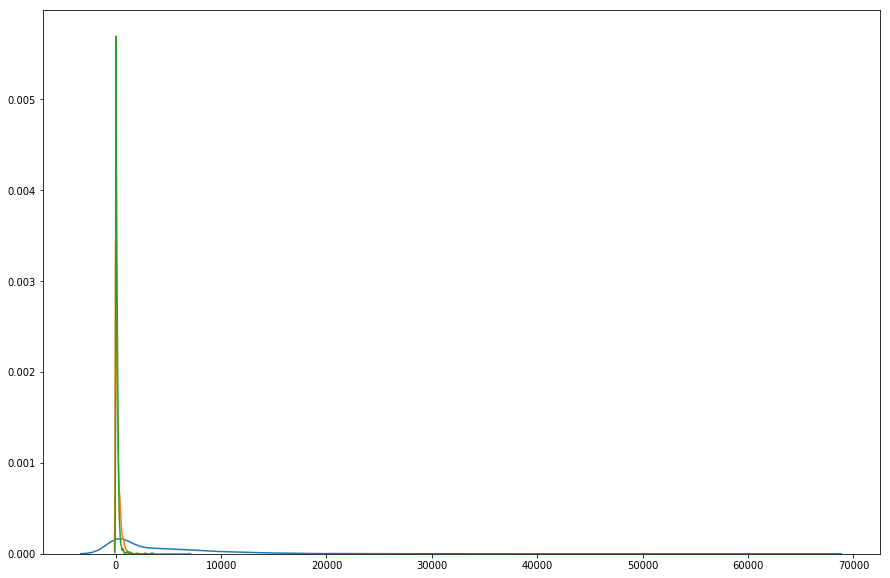

In [22]:
plt.figure(figsize=(15,10))
# Sort the dataframe by target
target_0 = df[df['handle'] == 'ThomasSowell']
target_1 = df[df['handle'] == 'TheAncientSage']
target_2 = df[df['handle'] == 'orangebook_']

sns.distplot(target_0[['likes']], hist=False)
sns.distplot(target_1[['likes']], hist=False)
sns.distplot(target_2[['likes']], hist=False)

plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


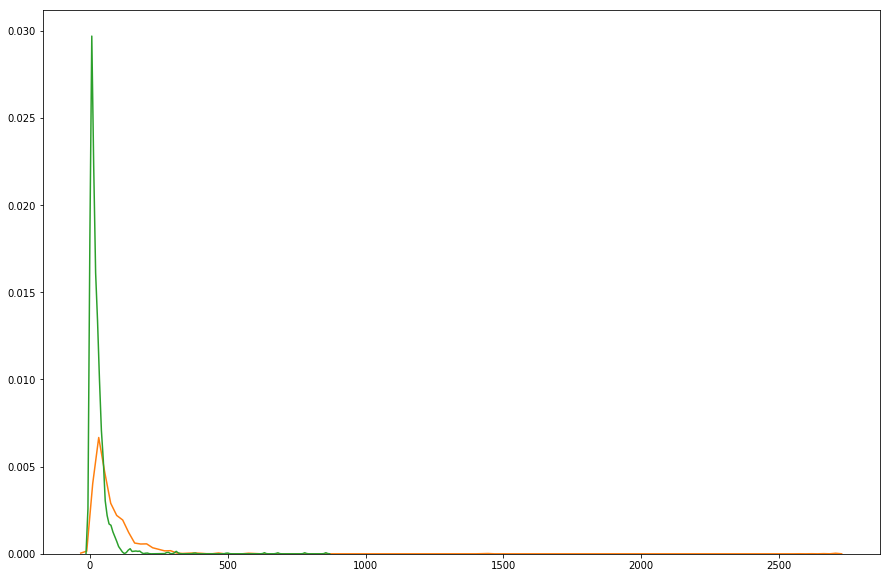

In [23]:
plt.figure(figsize=(15,10))
# Sort the dataframe by target
target_0 = df[df['handle'] == 'ThomasSowell ']
target_1 = df[df['handle'] == 'TheAncientSage']
target_2 = df[df['handle'] == 'orangebook_']

sns.distplot(target_0[['retweets']], hist=False)
sns.distplot(target_1[['retweets']], hist=False)
sns.distplot(target_2[['retweets']], hist=False)


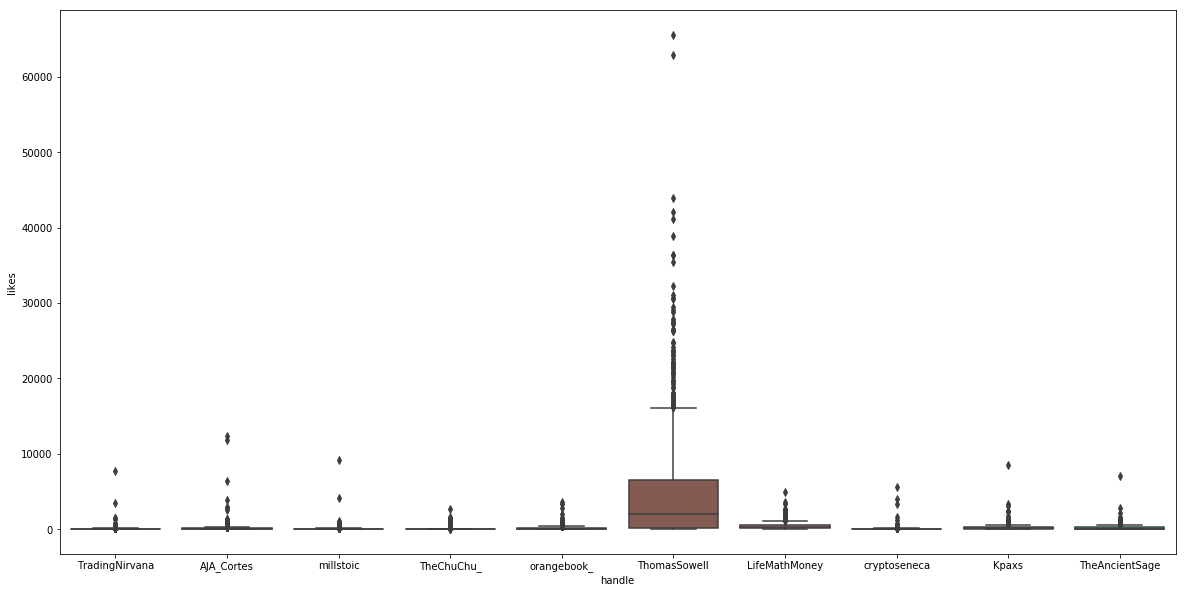

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x="handle", y="likes", data=df[df['handle'].isin(top_ten_authors)], ax=ax)
plt.show()

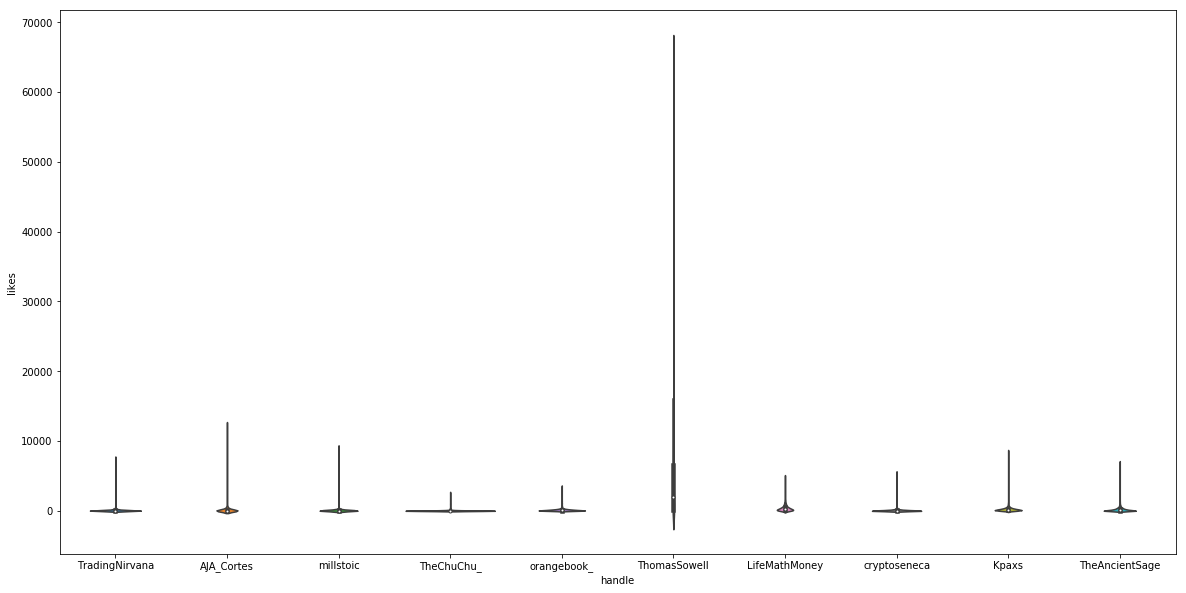

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
sns.violinplot(x="handle", y="likes", data=df[df['handle'].isin(top_ten_authors)], ax=ax)
plt.show()

** ThomasSowell is leading by a large margin.**

** It's amazing how ThomasSowell has such a flatter distribution.**

** Let's throw ThomasSowell out of the game.**

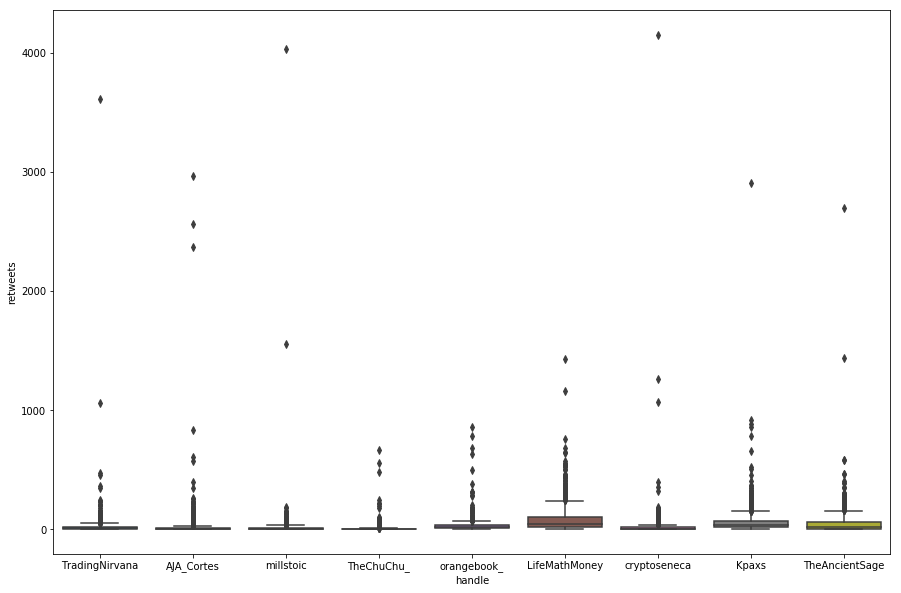

In [26]:
l  = top_ten_authors.to_list()
l.remove('ThomasSowell')
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="handle", y="retweets", data=df[df['handle'].isin(l)], ax=ax)
plt.show()

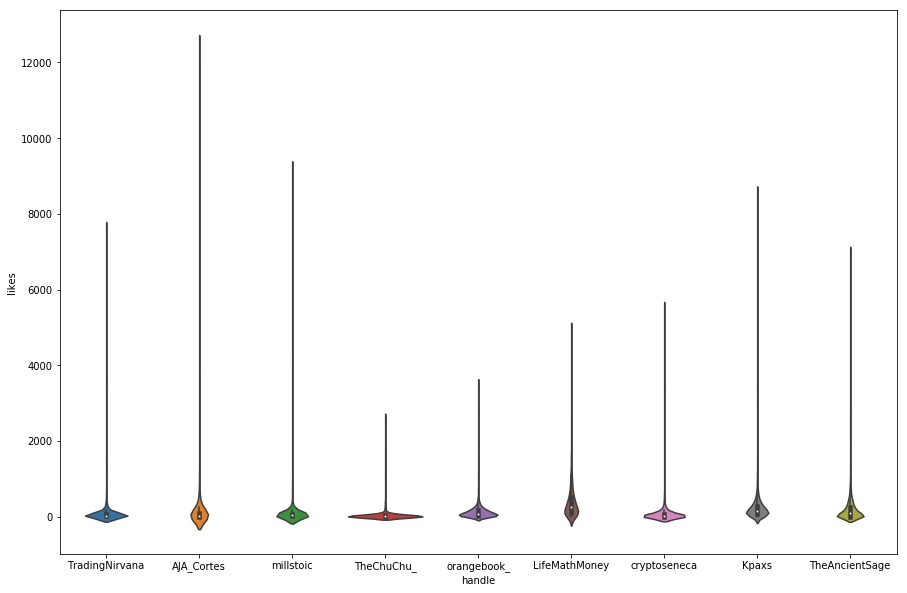

In [27]:
l  = top_ten_authors.to_list()
l.remove('ThomasSowell')
fig, ax = plt.subplots(figsize=(15,10))
sns.violinplot(x="handle", y="likes", data=df[df['handle'].isin(l)], ax=ax)
plt.show()

** Too much outliers. That is strange. Might be the "viral" factor of the internet**

** The distribution looks like Poisson distribution for each author. **


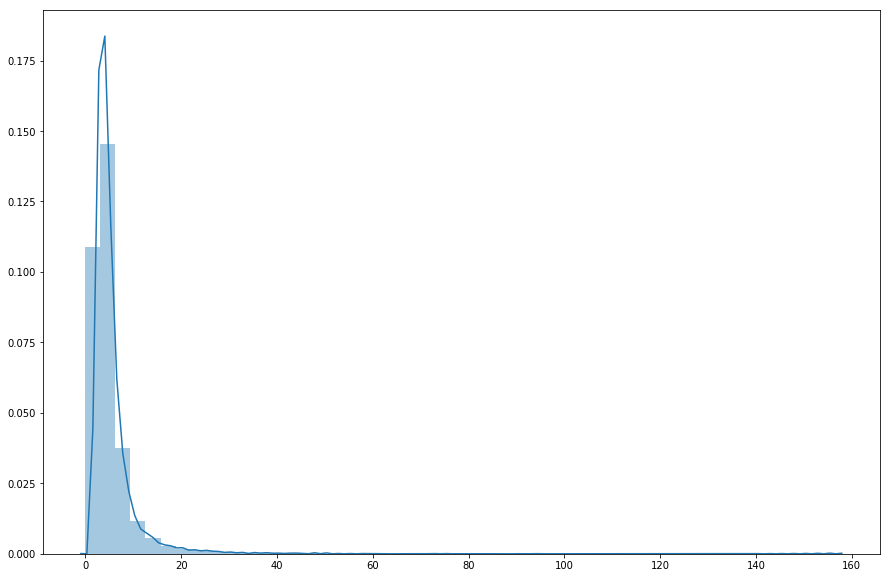

In [28]:
# Ratio of Likes and Retweets
fig, ax = plt.subplots(figsize=(15,10))
sns.distplot(df.likes / (1 + df.retweets))

In [29]:
print('Mean of the ratio distribution', (df.likes / (1 + df.retweets)).mean(), '\nStandard Deviation of the ratio distribution',(df.likes / (1 + df.retweets)).std())

Mean of the ratio distribution 4.99380322313397 
Standard Deviation of the ratio distribution 5.430230264290855


#### ThomasSowell

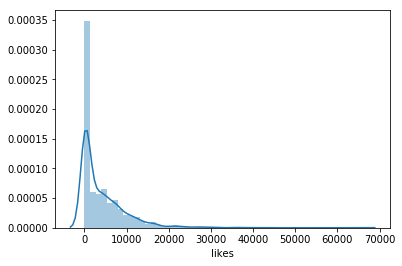

In [30]:
sns.distplot(df[df.handle=='ThomasSowell'].likes)

In [31]:
print('Mean of the likes in ThomasSowell tweets', df[df.handle=='ThomasSowell'].likes.mean(), '\nStandard Deviation of the likes in ThomasSowell tweets', df[df.handle=='ThomasSowell'].likes.std())

Mean of the likes in ThomasSowell tweets 4273.700890518596 
Standard Deviation of the likes in ThomasSowell tweets 5948.401298806228


#### Distribution of top 2 to 10 authors

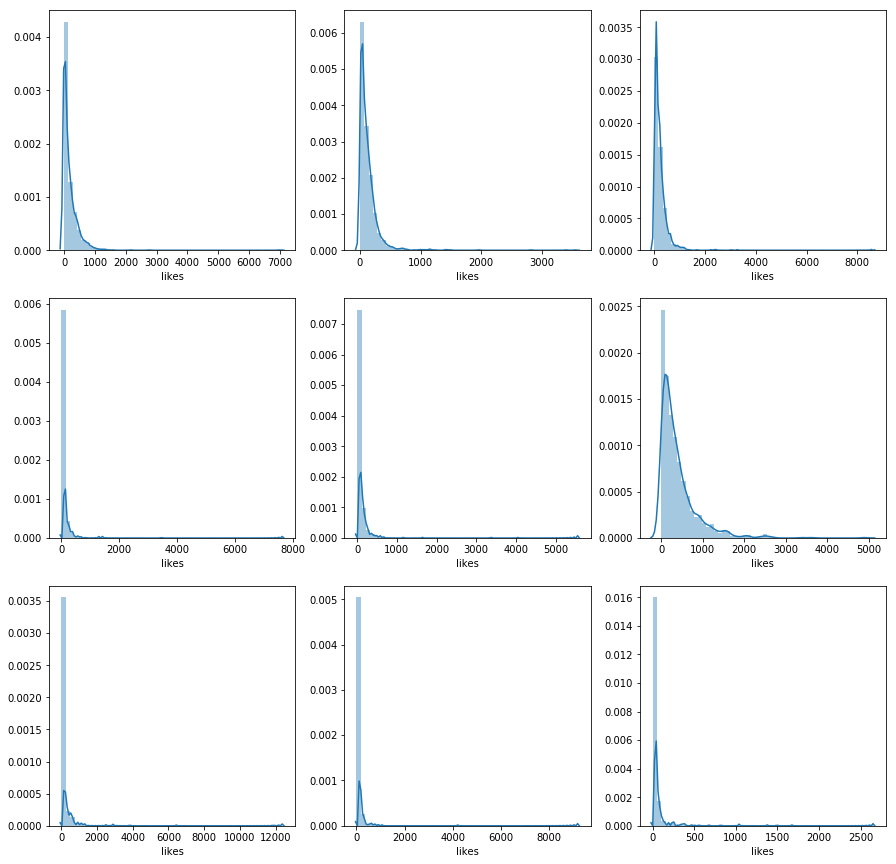

In [32]:
fig, ax = plt.subplots(3, 3, figsize=(15,15))
for i in range(3):
    for j in range(3):
        sns.distplot(df[df.handle==top_ten_authors[i*3 + j  + 1]].likes, ax=ax[i][j])

In [33]:
for i in range(3):
    for j in range(3):
        print('Mean of the likes in', top_ten_authors[i*3 + j  + 1], 'tweets', df[df.handle==top_ten_authors[i*3 + j  + 1]].likes.mean(), '\nStandard Deviation of the likes in', top_ten_authors[i*3 + j  + 1], 'tweets', df[df.handle==top_ten_authors[i*3 + j + 1]].likes.std(), '\n')

Mean of the likes in TheAncientSage tweets 176.9994040524434 
Standard Deviation of the likes in TheAncientSage tweets 290.06084632933175 

Mean of the likes in orangebook_ tweets 130.842865743528 
Standard Deviation of the likes in orangebook_ tweets 203.4673799200785 

Mean of the likes in Kpaxs tweets 237.84322678843228 
Standard Deviation of the likes in Kpaxs tweets 347.6253002245682 

Mean of the likes in TradingNirvana tweets 77.02317880794702 
Standard Deviation of the likes in TradingNirvana tweets 266.8005863947346 

Mean of the likes in cryptoseneca tweets 71.05887372013652 
Standard Deviation of the likes in cryptoseneca tweets 245.8635332353912 

Mean of the likes in LifeMathMoney tweets 400.368320610687 
Standard Deviation of the likes in LifeMathMoney tweets 464.22451159072443 

Mean of the likes in AJA_Cortes tweets 142.66492146596858 
Standard Deviation of the likes in AJA_Cortes tweets 644.9351736188058 

Mean of the likes in millstoic tweets 84.10928961748634 
Standa

** Aren't they look like poisson distribution with mean and std as lambda ** 

** Let's plot distribution as the difference between mean and standard deviation **

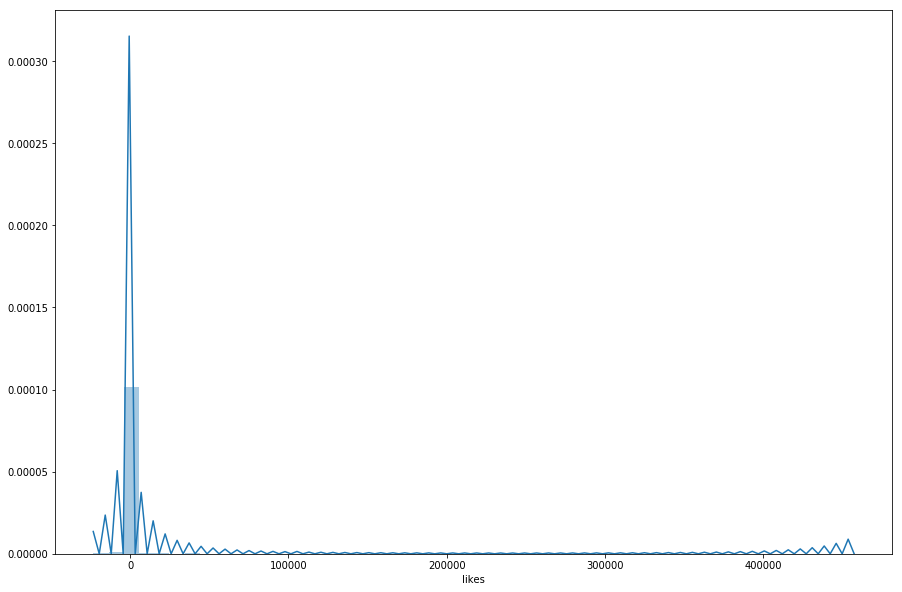

In [34]:
plt.figure(figsize=(15,10))
dis = df.groupby('handle').filter(lambda group: group.size > 10)
sns.distplot(dis.groupby('handle').likes.mean() - dis.groupby('handle').likes.std())

** Oh! Mean revolves around zero with small deviation. We can estimate the curve as a poisson distribution. Let's see if we can use it in the future. **

In [35]:
df.head()

author_name           created_at handle  likes  retweets  \
0       Naval  2019-08-07 22:36:56  naval   7566      1498   
1       Naval  2019-08-07 05:00:38  naval  21886      5984   
2       Naval  2019-08-07 04:52:33  naval   6462      1266   
3       Naval  2019-08-06 08:35:26  naval    466        61   
4       Naval  2019-08-06 07:33:20  naval   3971       906   

                                       tweet_content  
0  Unresolved thoughts, prematurely pushed out of...  
1  The modern mind is overstimulated and the mode...  
2  The Lindy Effect for startups:\n\nThe longer y...  
3               @orangebook_ This was a good tweet.   
4  Social media lowers the cost of raising &amp; ...

# Time to focus on time
* Relation between time and likes.
* Likes distribution wrt timestamp for each author
* Does time of tweet has any relation with likes?
* Does author's presence on twitter effects the likes author would get?
* How mean likes change over the time. 
* How mean tweet count change over the time. 
* Graph between the duration between two tweets (everyday presence) and it's relation with the likes. 
* Does viral tweets matter?

In [36]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [37]:
df.created_at.head()

0    2019-08-07 22:36:56
1    2019-08-07 05:00:38
2    2019-08-07 04:52:33
3    2019-08-06 08:35:26
4    2019-08-06 07:33:20
Name: created_at, dtype: object

In [38]:
df.created_at = pd.to_datetime(df.created_at, format='%Y-%m-%d %H:%M:%S')

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


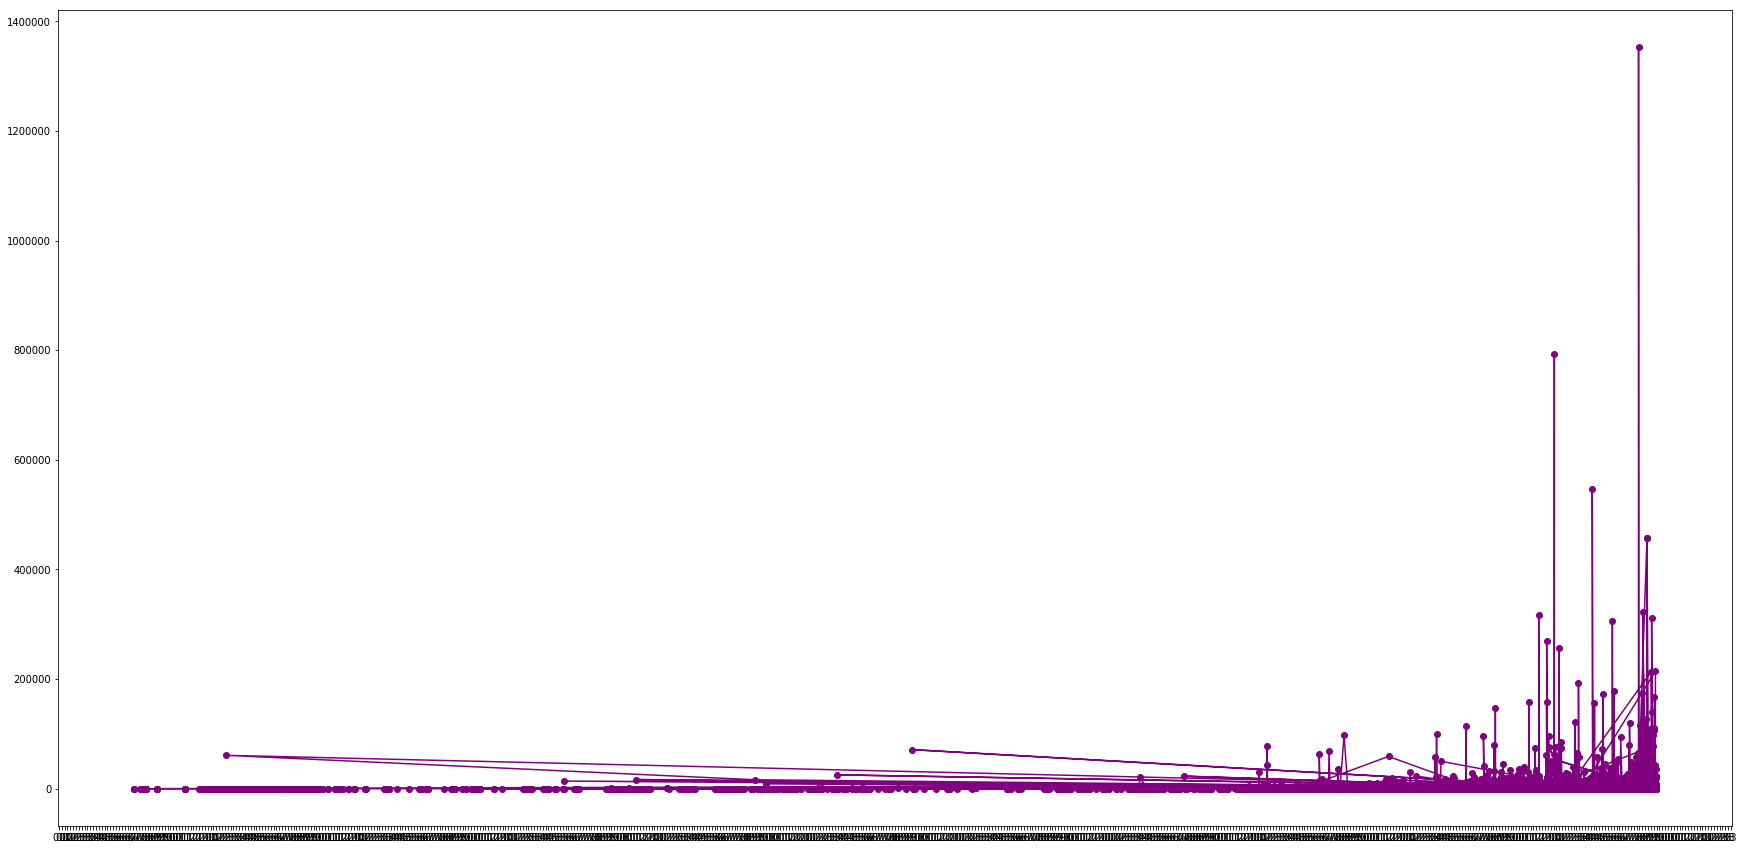

In [39]:
# Create the plot space upon which to plot the data
fig, ax = plt.subplots(figsize=(30, 15))

# Add the x-axis and the y-axis to the plot
ax.plot(df.created_at,
        df.likes, '-o',
        color='purple')

# Clean up the x axis dates (reviewed in lesson 4)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%m"))

plt.show()

** Older tweets has less likes than newer ones. One reason might be the growing rate of Twitter which means more users which means more likes **

In [40]:
df['creation_month'] = df.created_at.dt.month
df['creation_day'] = df.created_at.dt.day
df['creation_year'] = df.created_at.dt.year
df['creation_hour'] = df.created_at.dt.hour

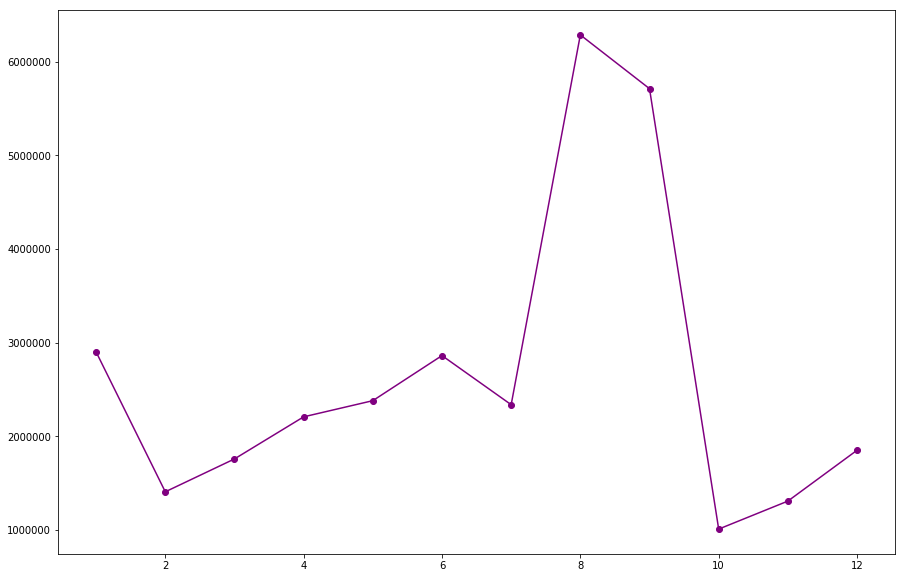

In [41]:
# Create the plot space upon which to plot the data
fig, ax = plt.subplots(figsize=(15, 10))


# Add the x-axis and the y-axis to the plot
ax.plot(np.sort(df.creation_month.unique()),
        df.groupby('creation_month').likes.sum(), '-o',
        color='purple')

plt.show()

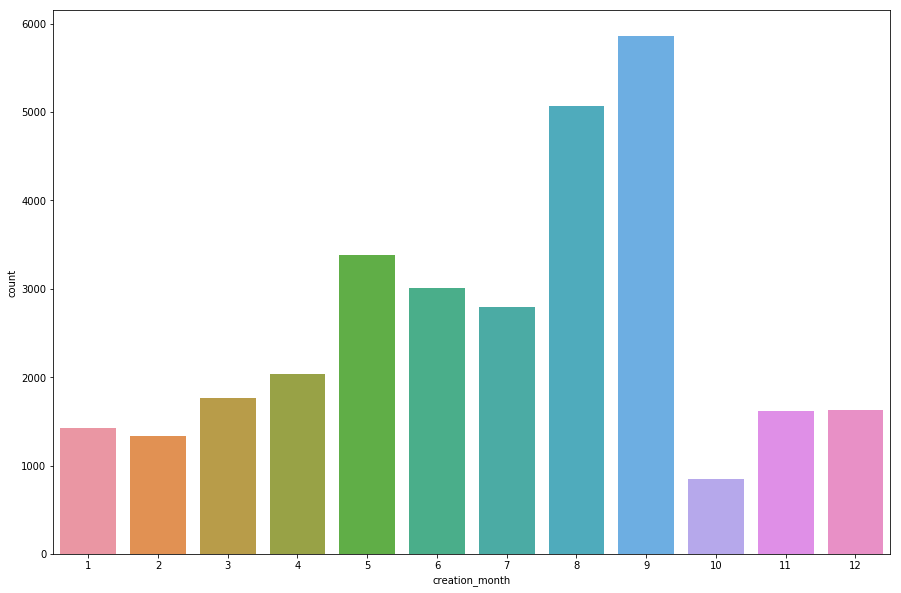

In [42]:
plt.subplots(figsize=(15, 10))
sns.countplot(df.creation_month)

** A great rise in the number of tweets as well as sum of likes in the month of Aug and Sept **

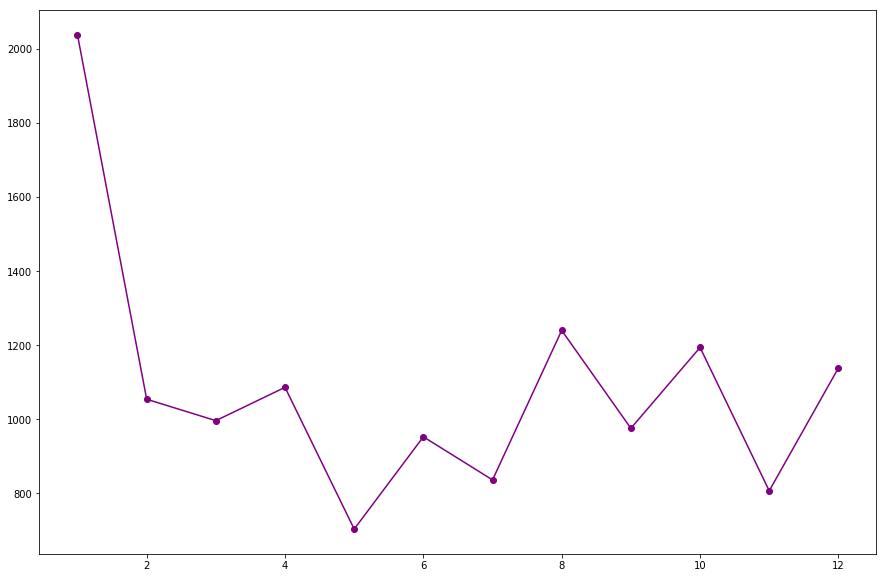

In [43]:
# Create the plot space upon which to plot the data
fig, ax = plt.subplots(figsize=(15, 10))


# Add the x-axis and the y-axis to the plot
ax.plot(np.sort(df.creation_month.unique()),
        df.groupby('creation_month').likes.mean(), '-o',
        color='purple')

plt.show()

** The likes per tweet is highest for the tweets that are created in january. As we observed previously, tweets has very low rate of getting time as it gets older. I might be reaching here but since most of these tweets are motivational and january is the time for New year Resolution, there might be chances that people follow motivational tweets in January more. As there new year reolution, there engagement with the tweet also declines in Feb and March. **

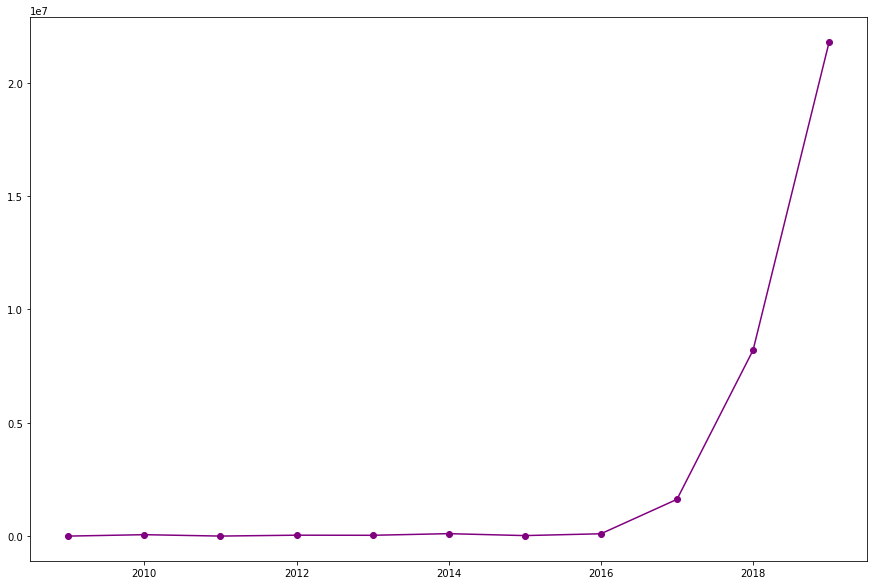

In [44]:
# Create the plot space upon which to plot the data
fig, ax = plt.subplots(figsize=(15, 10))


# Add the x-axis and the y-axis to the plot
ax.plot(np.sort(df.creation_year.unique()),
        df.groupby('creation_year').likes.sum(), '-o',
        color='purple')

plt.show()

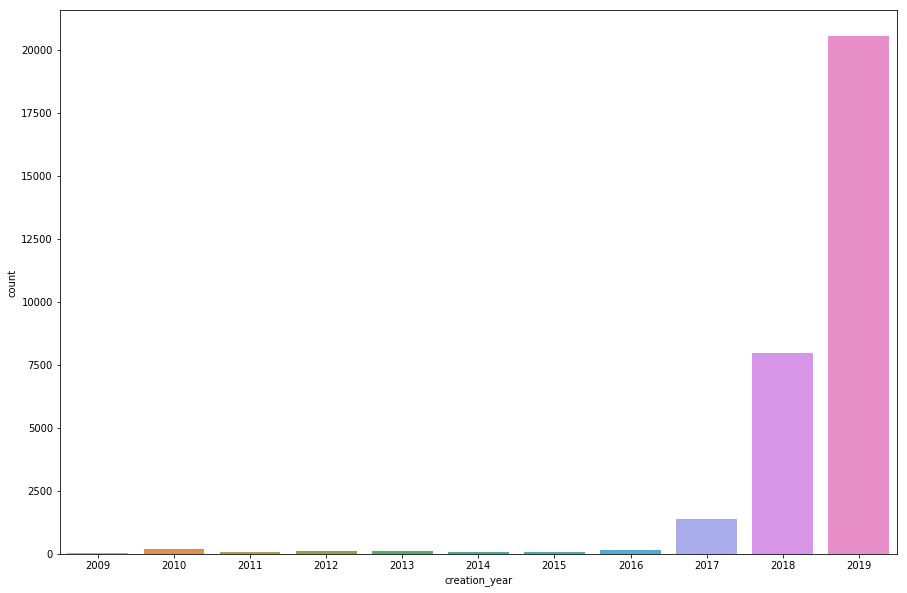

In [45]:
plt.subplots(figsize=(15, 10))
sns.countplot(df.creation_year)

** This is the living proof of exponential growth of Twitter after 2014 **


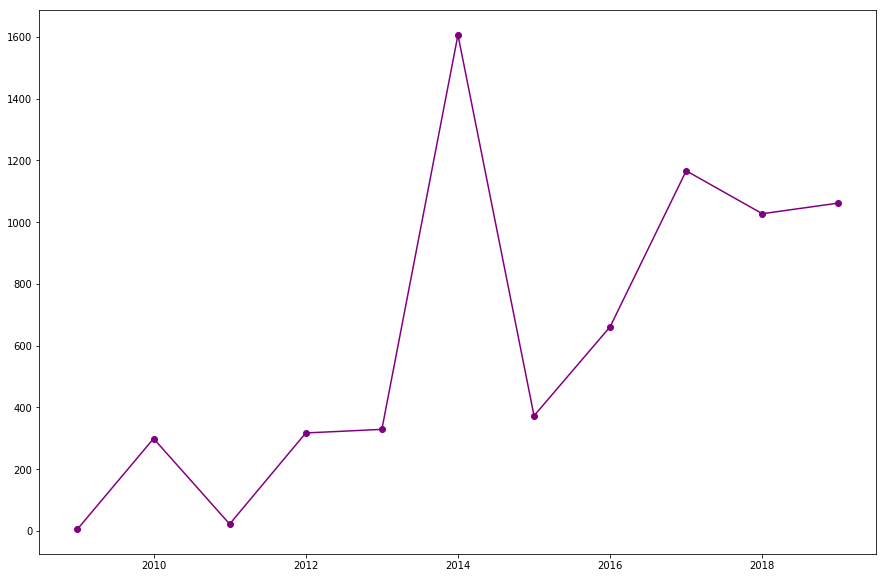

In [46]:
# Create the plot space upon which to plot the data
fig, ax = plt.subplots(figsize=(15, 10))


# Add the x-axis and the y-axis to the plot
ax.plot(np.sort(df.creation_year.unique()),
        df.groupby('creation_year').likes.mean(), '-o',
        color='purple')

plt.show()

** Here is something interesting, Likes per tweet is highest in 2014 and then decreases. It might be because number of users has increased drastically. **

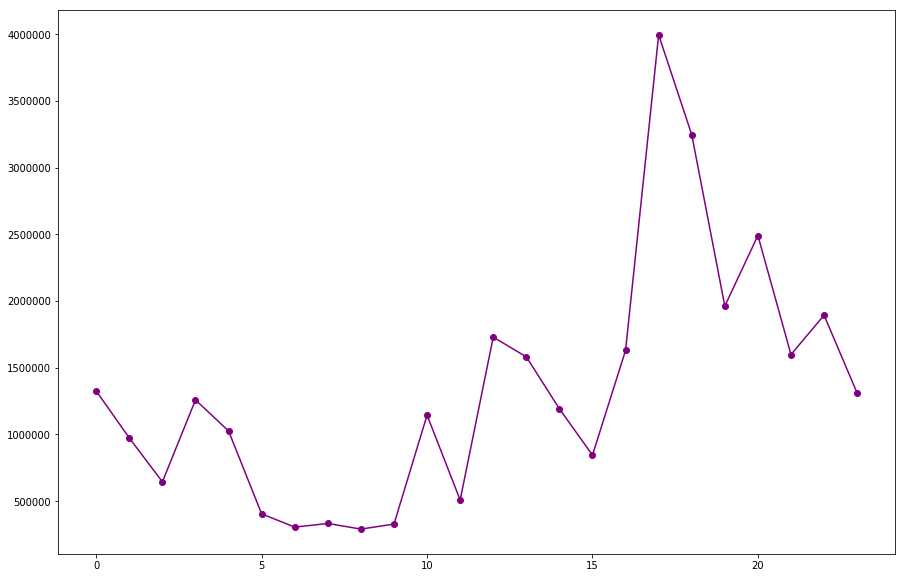

In [47]:
# Create the plot space upon which to plot the data
fig, ax = plt.subplots(figsize=(15, 10))


# Add the x-axis and the y-axis to the plot
ax.plot(np.sort(df.creation_hour.unique()),
        df.groupby('creation_hour').likes.sum(), '-o',
        color='purple')

plt.show()

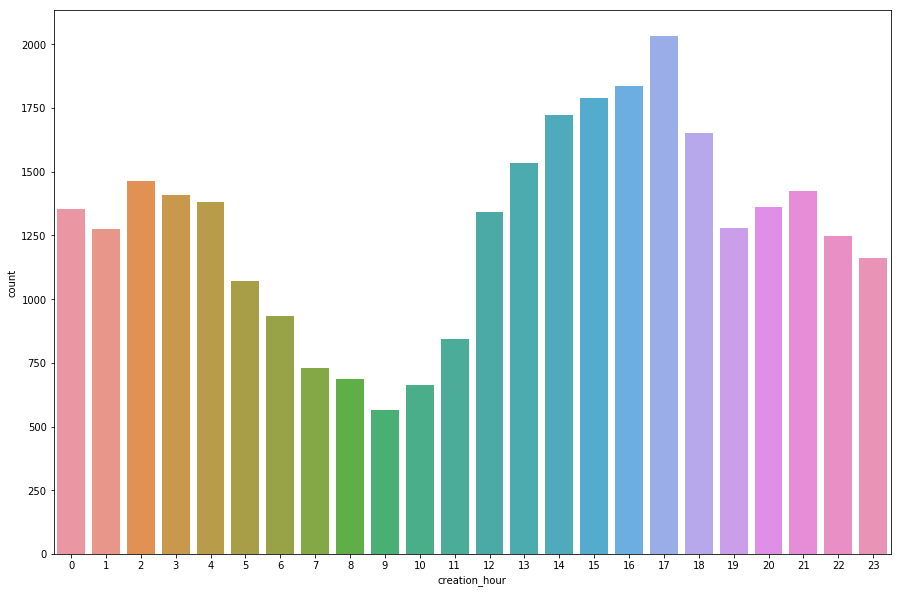

In [48]:
plt.subplots(figsize=(15, 10))
sns.countplot(df.creation_hour)

** Twittter acocunts are from different countries. Some of them are from USA, some are from India and the rest are from the Europe and Africa**

** But the count of tweets decrease and increase from the 5th hour to 13th hour (8 hours). Now the way it is decreasing it looks like it is sleeping time for the majority of authors. **

** Even in the total likes graph, the graph is lowest between (5-10). It implies even the followers are sleeping at the time of tweet** 

** Also at the 16-18 hours, both the tweets count as well as aggregated hit peak. If we assume 5-13 is the sleeping time, we can say that 16-18 is noon time which means the lunch time.**

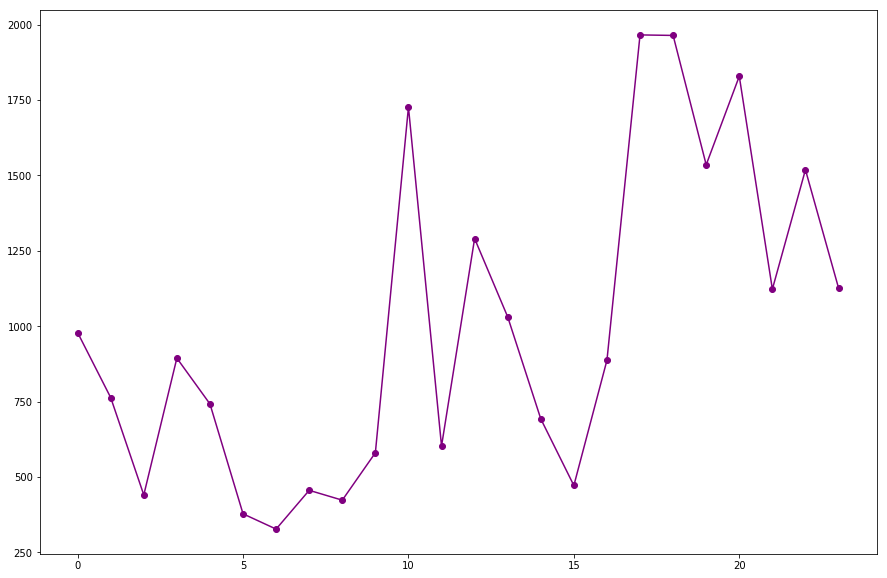

In [49]:
# Create the plot space upon which to plot the data
fig, ax = plt.subplots(figsize=(15, 10))


# Add the x-axis and the y-axis to the plot
ax.plot(np.sort(df.creation_hour.unique()),
        df.groupby('creation_hour').likes.mean(), '-o',
        color='purple')

plt.show()

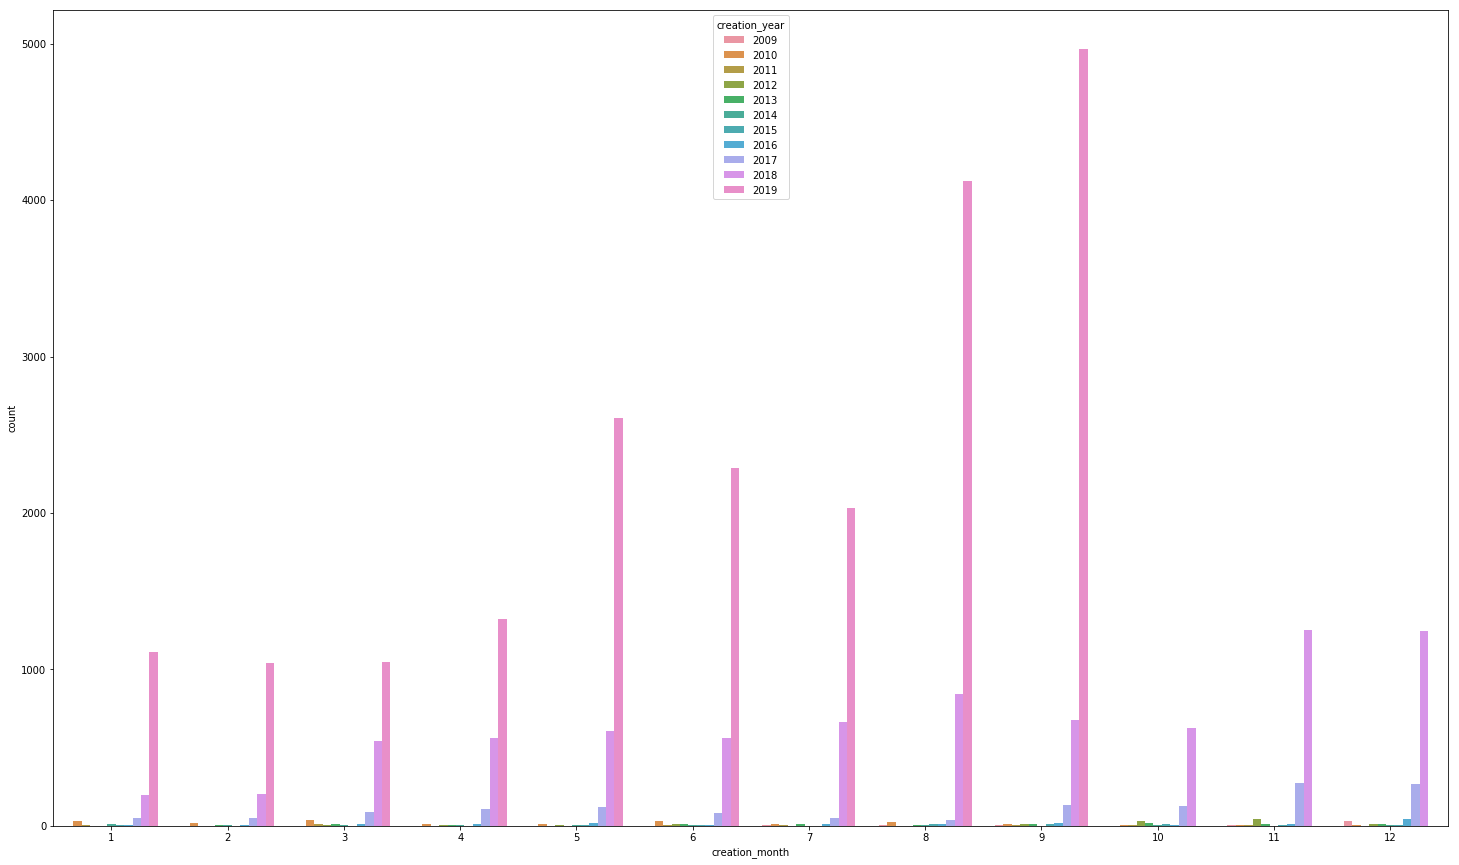

In [50]:
plt.subplots(figsize=(25, 15))
sns.countplot(df.creation_month, hue=df.creation_year)

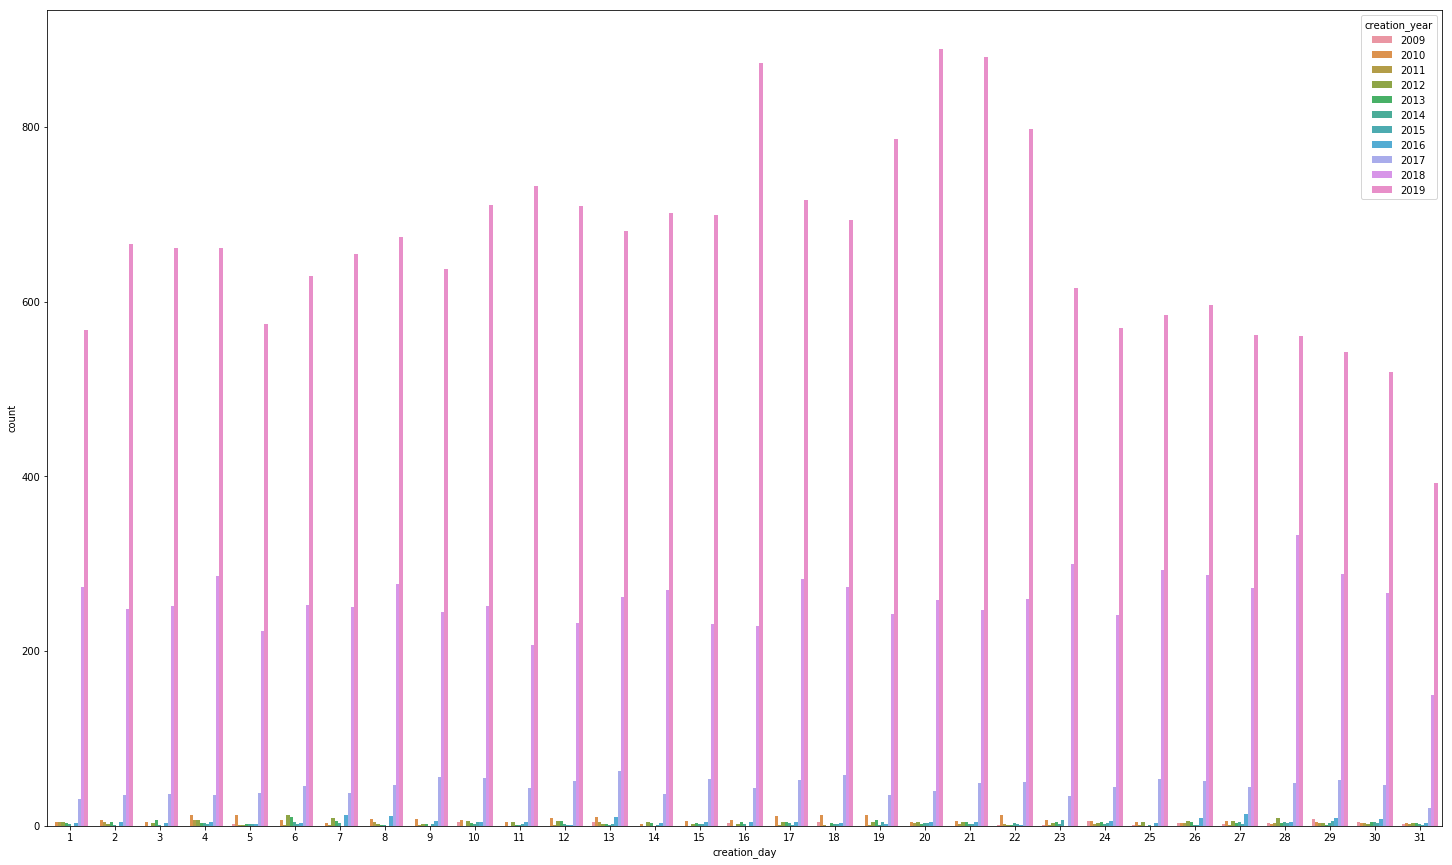

In [51]:
plt.subplots(figsize=(25, 15))
sns.countplot(df.creation_day, hue=df.creation_year)

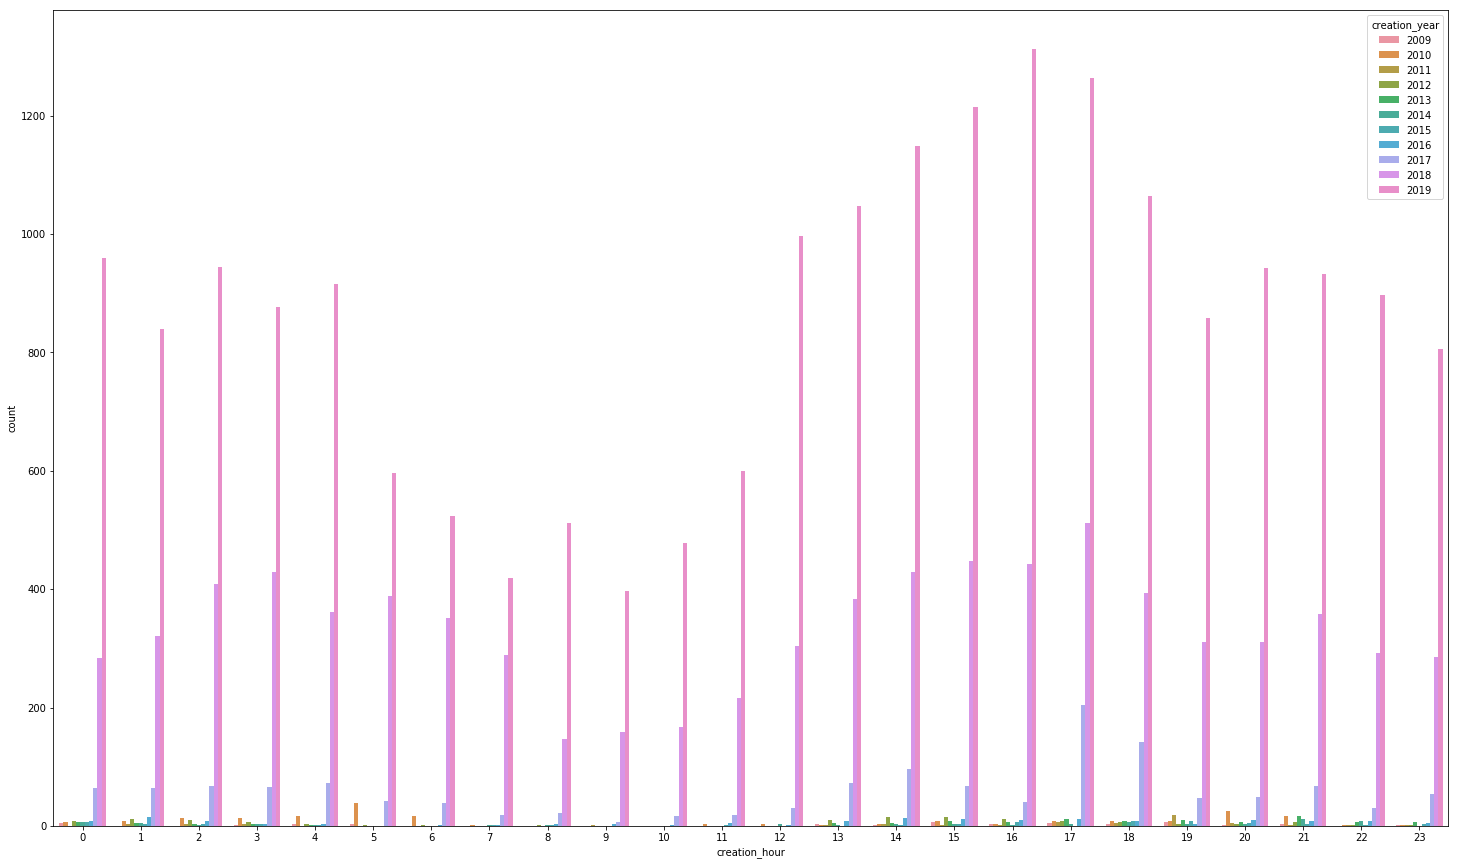

In [52]:
plt.subplots(figsize=(25, 15))
sns.countplot(df.creation_hour, hue=df.creation_year)

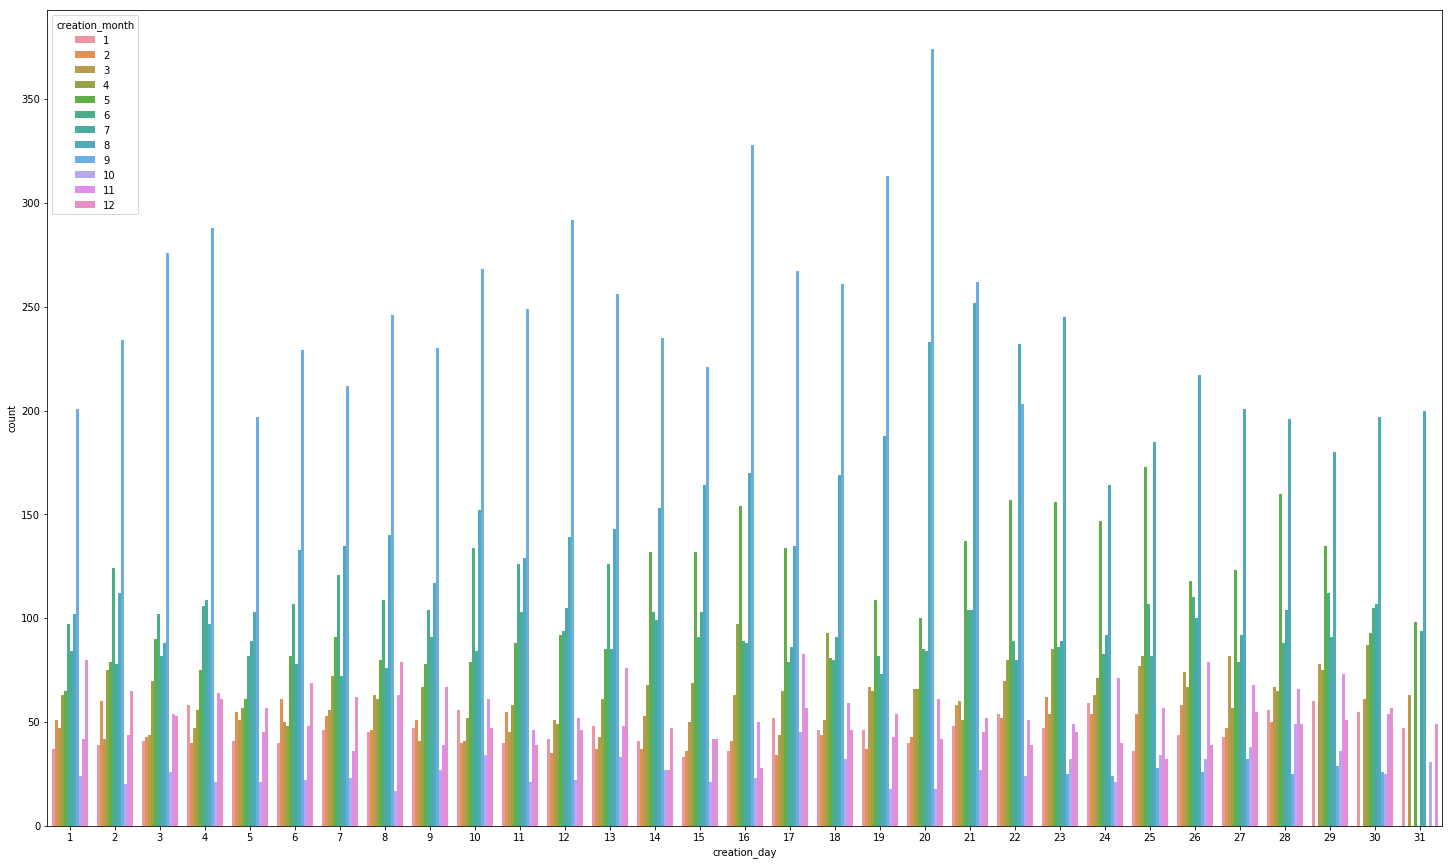

In [53]:
plt.subplots(figsize=(25, 15))
sns.countplot(df.creation_day, hue=df.creation_month)

### Author Wise Tweets-time Analysis

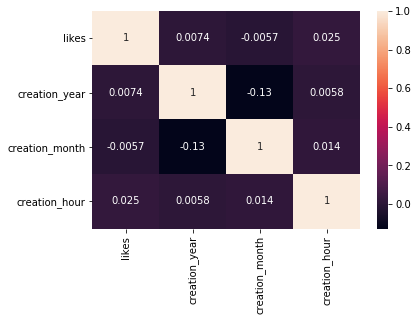

In [54]:
sns.heatmap(df[['likes', 'creation_year', 'creation_month', 'creation_hour']].corr(), annot=True)

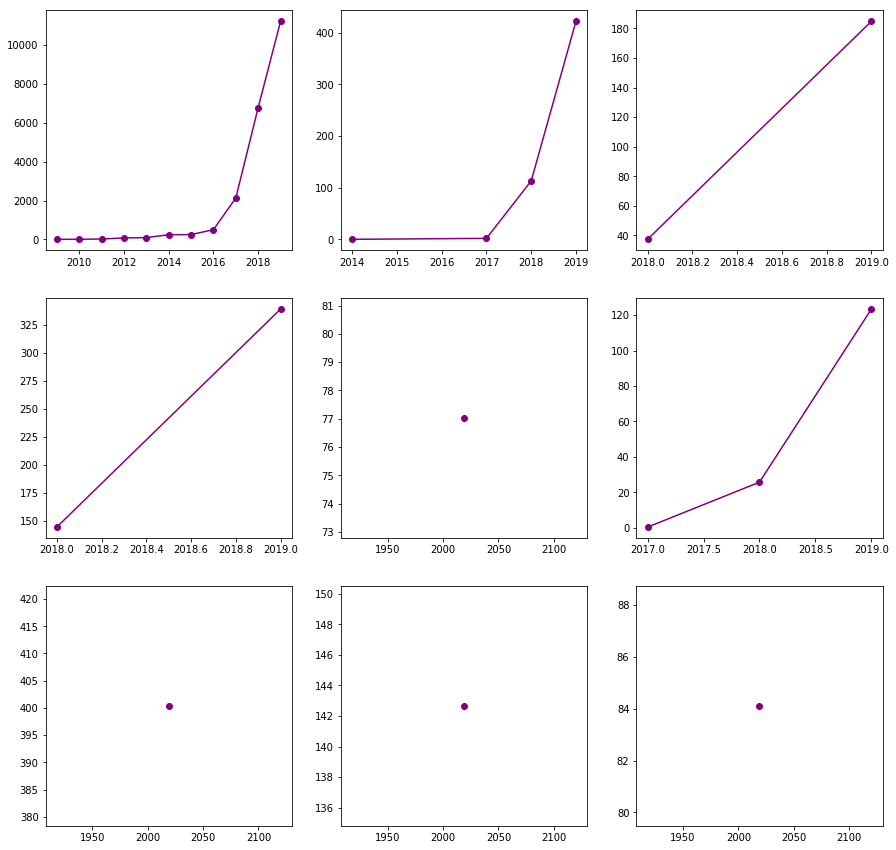

In [55]:
fig, ax = plt.subplots(3, 3, figsize=(15,15))
for i in range(3):
    for j in range(3):
        ax[i][j].plot(np.sort(df[df['handle'] == top_ten_authors[3 * i + j]].creation_year.unique()), df[df['handle'] == top_ten_authors[3 * i + j]].groupby('creation_year').likes.mean(), '-o', color='purple')

** Even many of the top authors have started a less than a year ago. I wonder if your duration on twitter can affect your likes. Let's find out**

In [56]:
from datetime import datetime

In [57]:
(datetime.today() - df.groupby('handle').created_at.min()).dt.days

handle
0rganicplease     170
0x49fa98          391
0xProject         706
17cShyteposter     20
1980sJohnny        25
                 ... 
zikisgenjoshua     37
zombiemikemma      37
zooko             730
zslayback          38
zuhayeer          591
Name: created_at, Length: 2775, dtype: int64

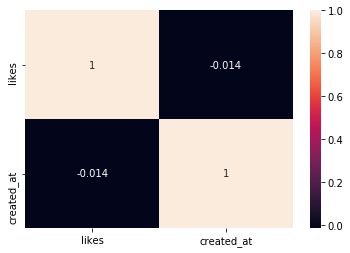

In [58]:
sns.heatmap(pd.concat([df.groupby('handle').likes.mean(), (datetime.today() - df.groupby('handle').created_at.min()).dt.days], axis=1).corr(), annot=True)

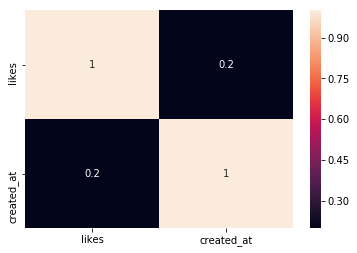

In [59]:
sns.heatmap(pd.concat([df.groupby('handle').likes.sum(), (datetime.today() - df.groupby('handle').created_at.min()).dt.days], axis=1).corr(), annot=True)

** Well there is no significant correlation between the profile duration on twitter and mean tweet. Though there is a small positive correlation in total tweet vs duration. But it is expected. My question was does author's presence has any significance i.e does it matter that author created account in 2008 and the one is 2019. As we have saw before that older tweets has lesser likes and hence older tweets has less impact on users. Also, there is almost no correlation between average likes and age of author on twitter. Both of these evidence strongly suggests that it doesn't matter what the author age on twitter.**

** Does "viral" tweets impact average likes? Logically, viral tweets(Tweets whose number of likes are greater than interquartile range) invite more user. But does it statistically matter? **

In [60]:
from scipy import stats
from scipy.ndimage.interpolation import shift


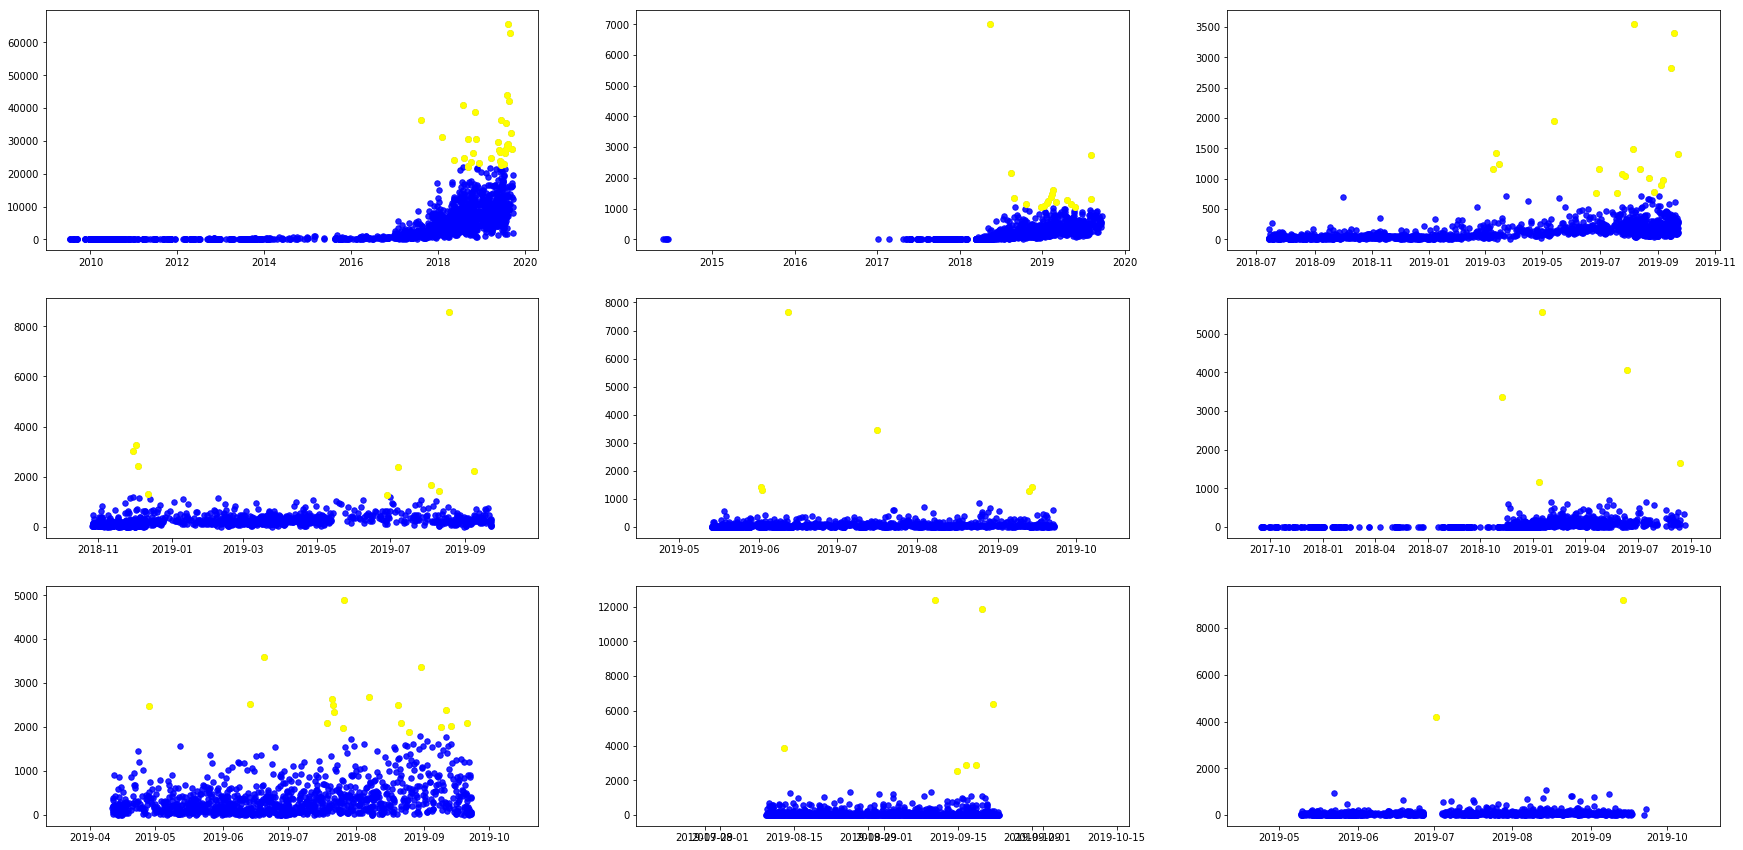

In [61]:
## Outliers("Viral tweets") are in yellow and else are in blue
fig, ax = plt.subplots(3, 3, figsize=(30,15))
for i in range(3):
    for j in range(3):
        ax[i][j].scatter(df[df['handle'] == top_ten_authors[3 * i + j]].created_at, df[df['handle'] == top_ten_authors[3 * i + j]].likes, facecolors='blue',alpha=.85, s=30)
        ax[i][j].scatter(df[df['handle'] == top_ten_authors[3 * i + j]][(np.abs(stats.zscore(df[df['handle'] == top_ten_authors[3 * i + j]].likes)) > 3)].created_at, df[df['handle'] == top_ten_authors[3 * i + j]][(np.abs(stats.zscore(df[df['handle'] == top_ten_authors[3 * i + j]].likes)) > 3)].likes, color="yellow")

In [62]:
def plot_avg_likes_between_viral_twts(author, ax):
    t = df[df['handle'] == author].sort_values(by = 'created_at').reset_index()
    idx = t[(np.abs(stats.zscore(t.likes)) > 3)].index
    idx_created = t[(np.abs(stats.zscore(t.likes)) > 3)].created_at
    x = t.created_at
    y = [0 for i in range(t.shape[0])]
    y2 = []
    prev = 0
    for i in idx:
        m = t[prev:i].likes.mean()
        for j in range(prev, i):
            y[j] = m
        y[i] = None
        y2.append(t.iloc[i].likes)
        prev = i + 1
    ax.plot(x, y, linewidth=2)
    ax.scatter(idx_created, y2, color="red")
    ax.set_title(author)

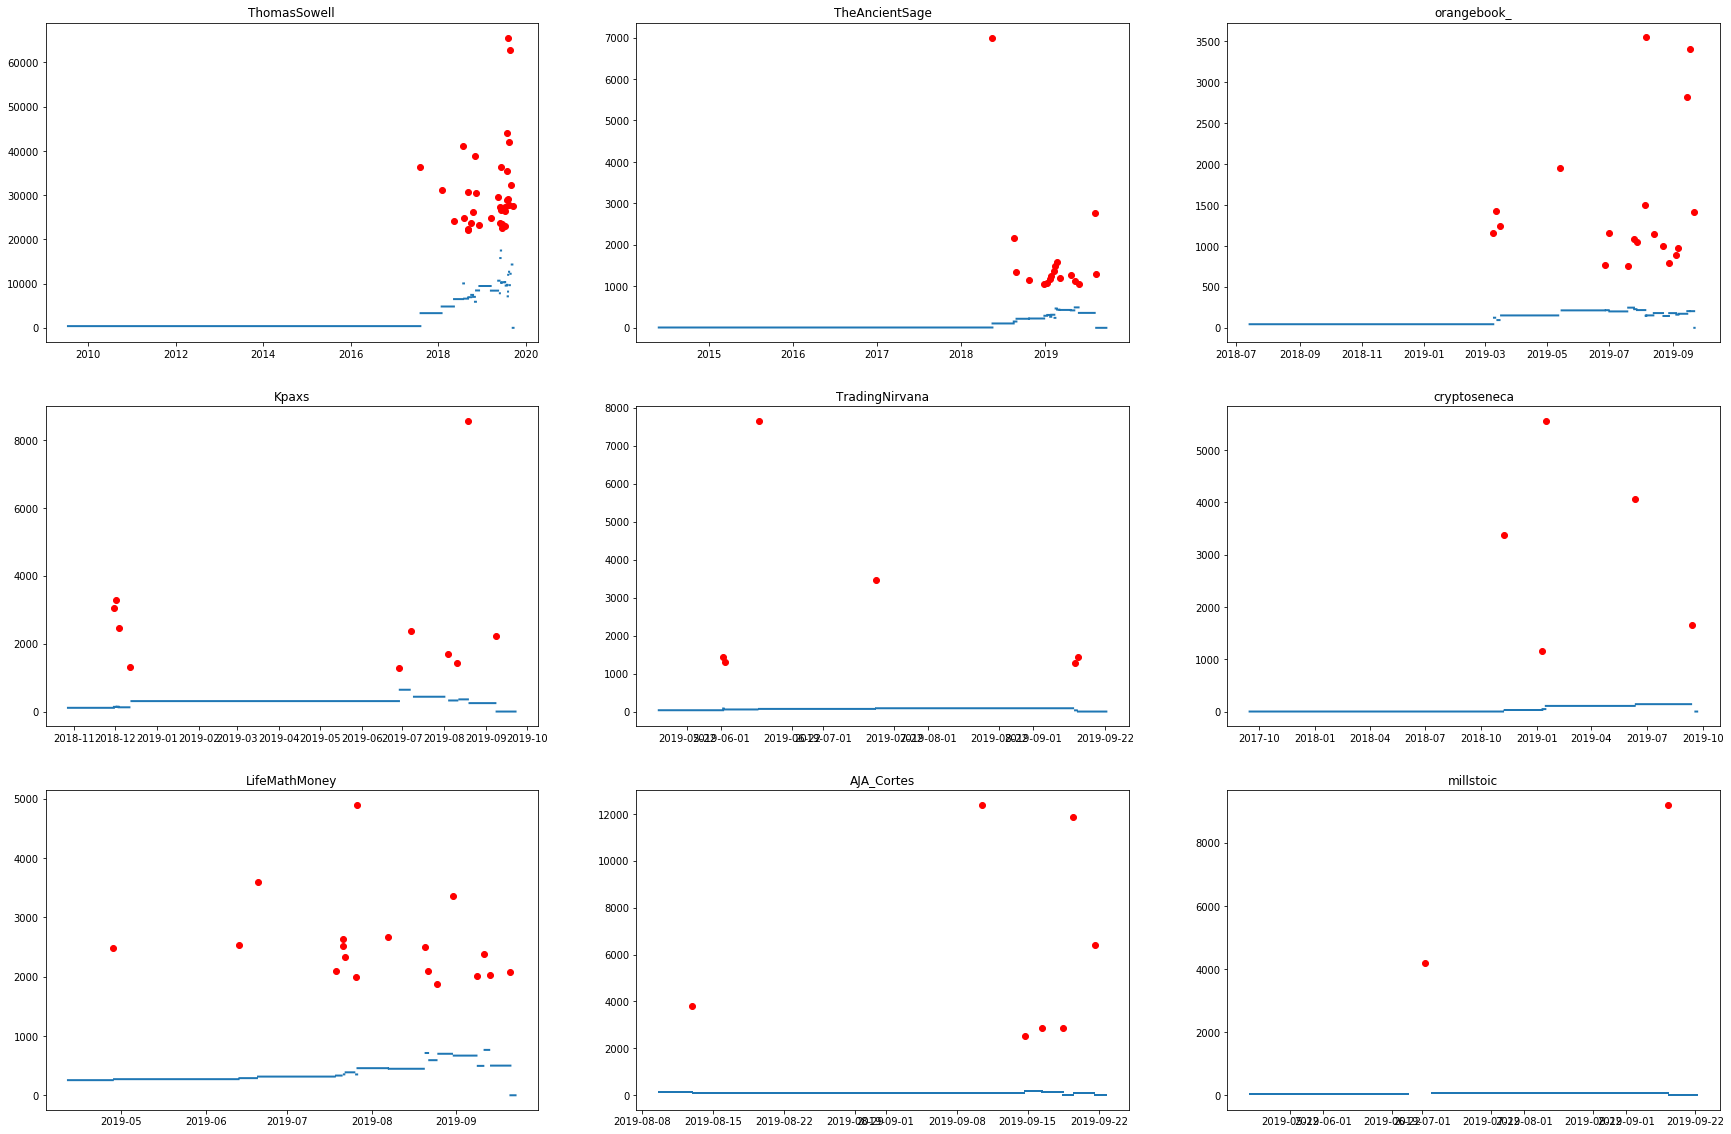

In [63]:
## The red ones are the viral tweets and the blue one is average of likes between two consecutive viral tweets
fig, ax = plt.subplots(3, 3, figsize=(30,20))
for i in range(3):
    for j in range(3):
        plot_avg_likes_between_viral_twts(top_ten_authors[3 * i + j], ax[i][j])

** It can be observed that a "viral" tweet increases the likes by a very little. But bunch of viral tweets in close time do increase likes on future tweets. This is expected behaviour but I was expecting the affect to be more. The affect is short term as well as  little as compare to the viralness of the tweet **

In [64]:
def change_in_likes_after_viral_twts(author, ax):
    t = df[df['handle'] == author].sort_values(by = 'created_at').reset_index()
    idx = t[(np.abs(stats.zscore(t.likes)) > 3)].index
    delta_change = []
    prev = 0
    prev_del = 0
    for i in idx:
        m = t[prev:i].likes.mean() - prev_del
        if(np.isnan(m) == False):
            delta_change.append(m)
            prev_del =  t[prev:i].likes.mean()
        prev = i + 1
    sns.distplot(np.array(delta_change) - shift(delta_change, 1, cval=0), ax=ax).set_title(author)

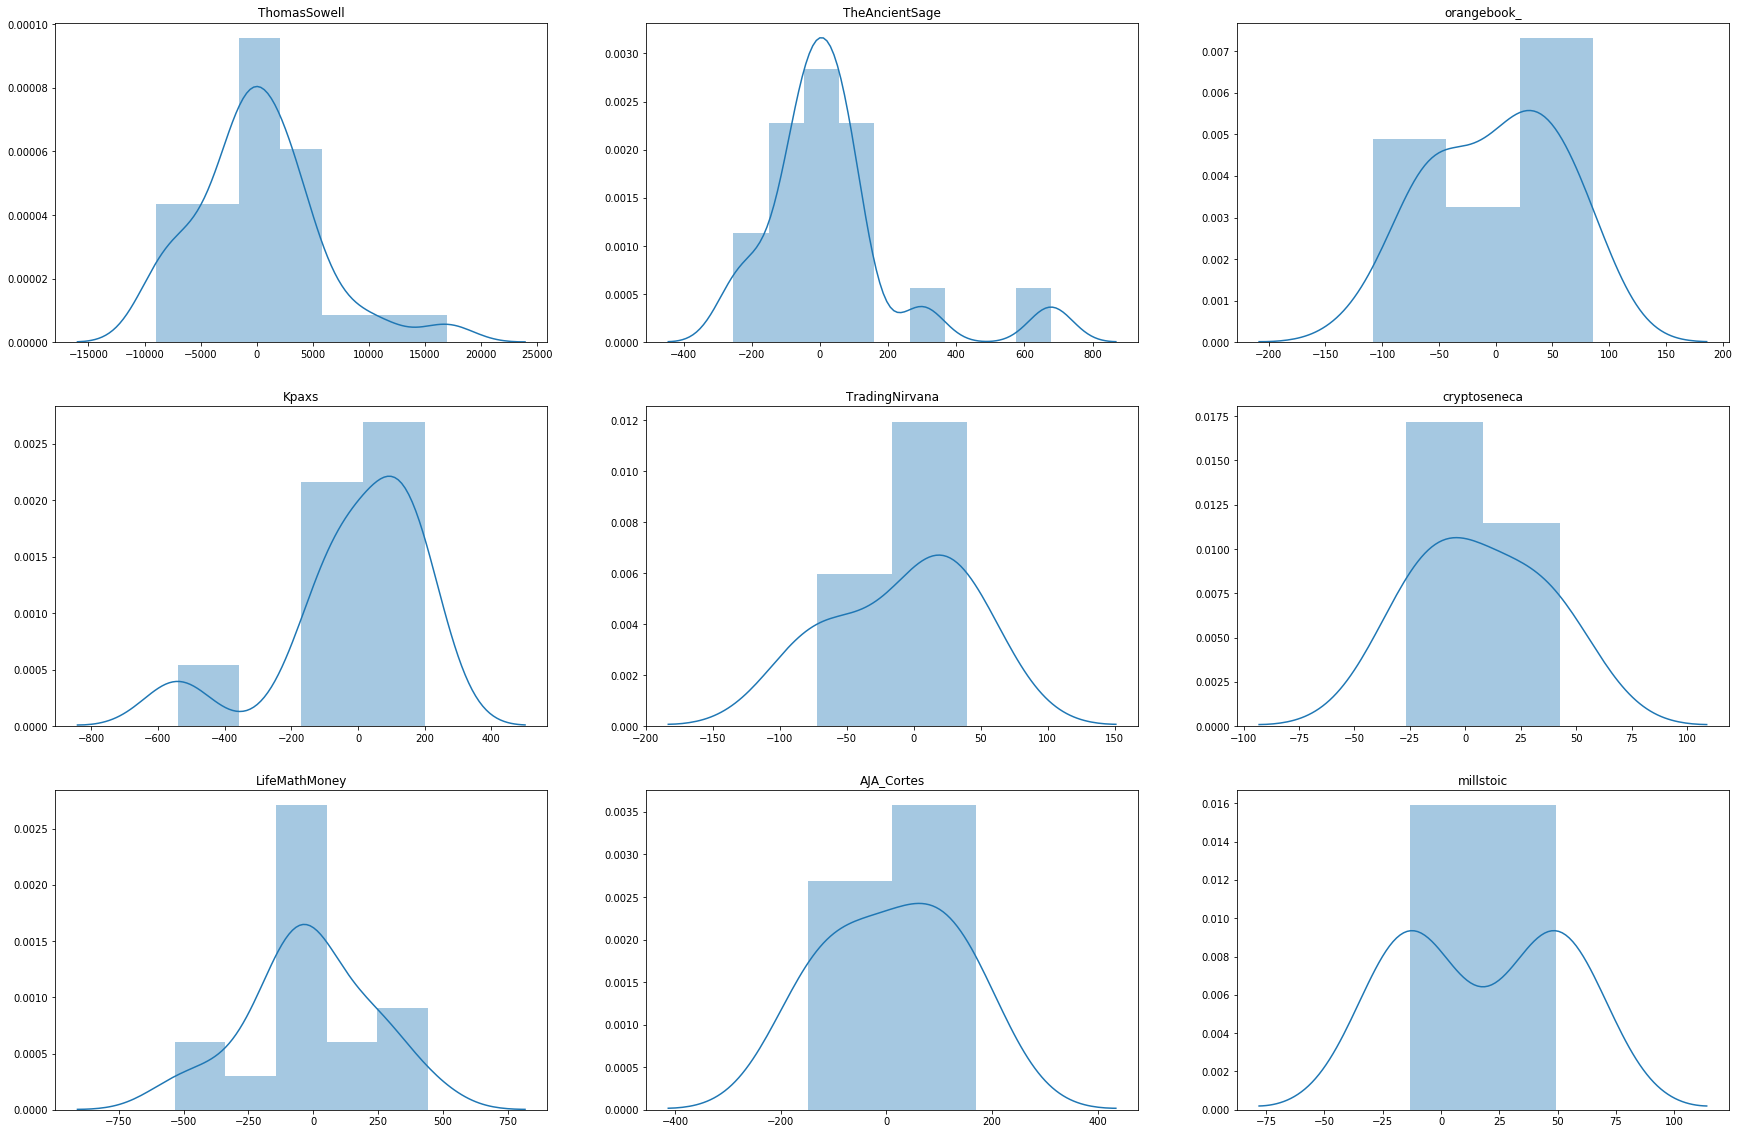

In [65]:
## The red ones are the viral tweets and the blue one is average of likes between two consecutive viral tweets
fig, ax = plt.subplots(3, 3, figsize=(30,20))
for i in range(3):
    for j in range(3):
        change_in_likes_after_viral_twts(top_ten_authors[3 * i + j], ax[i][j])

** In few of the cases, viral tweets increases the avg amount of likes one gets. But sometimes, it might decrease them which came as a surprise to me. Moreover in most of the cases, the average of the distribution tends to zero. I am start having doubts on viral tweets. I thought they are always good but statistically they have a negligible relevance over a long term. We've seen previously that author's tweeter age also does not matter neither the author's number of tweet. Does that mean, only your content determines the likes you got? I don't know but will investigate it soon. **

** Now let's talk about author's tweeter presence which I will estimate using duration between two tweets **

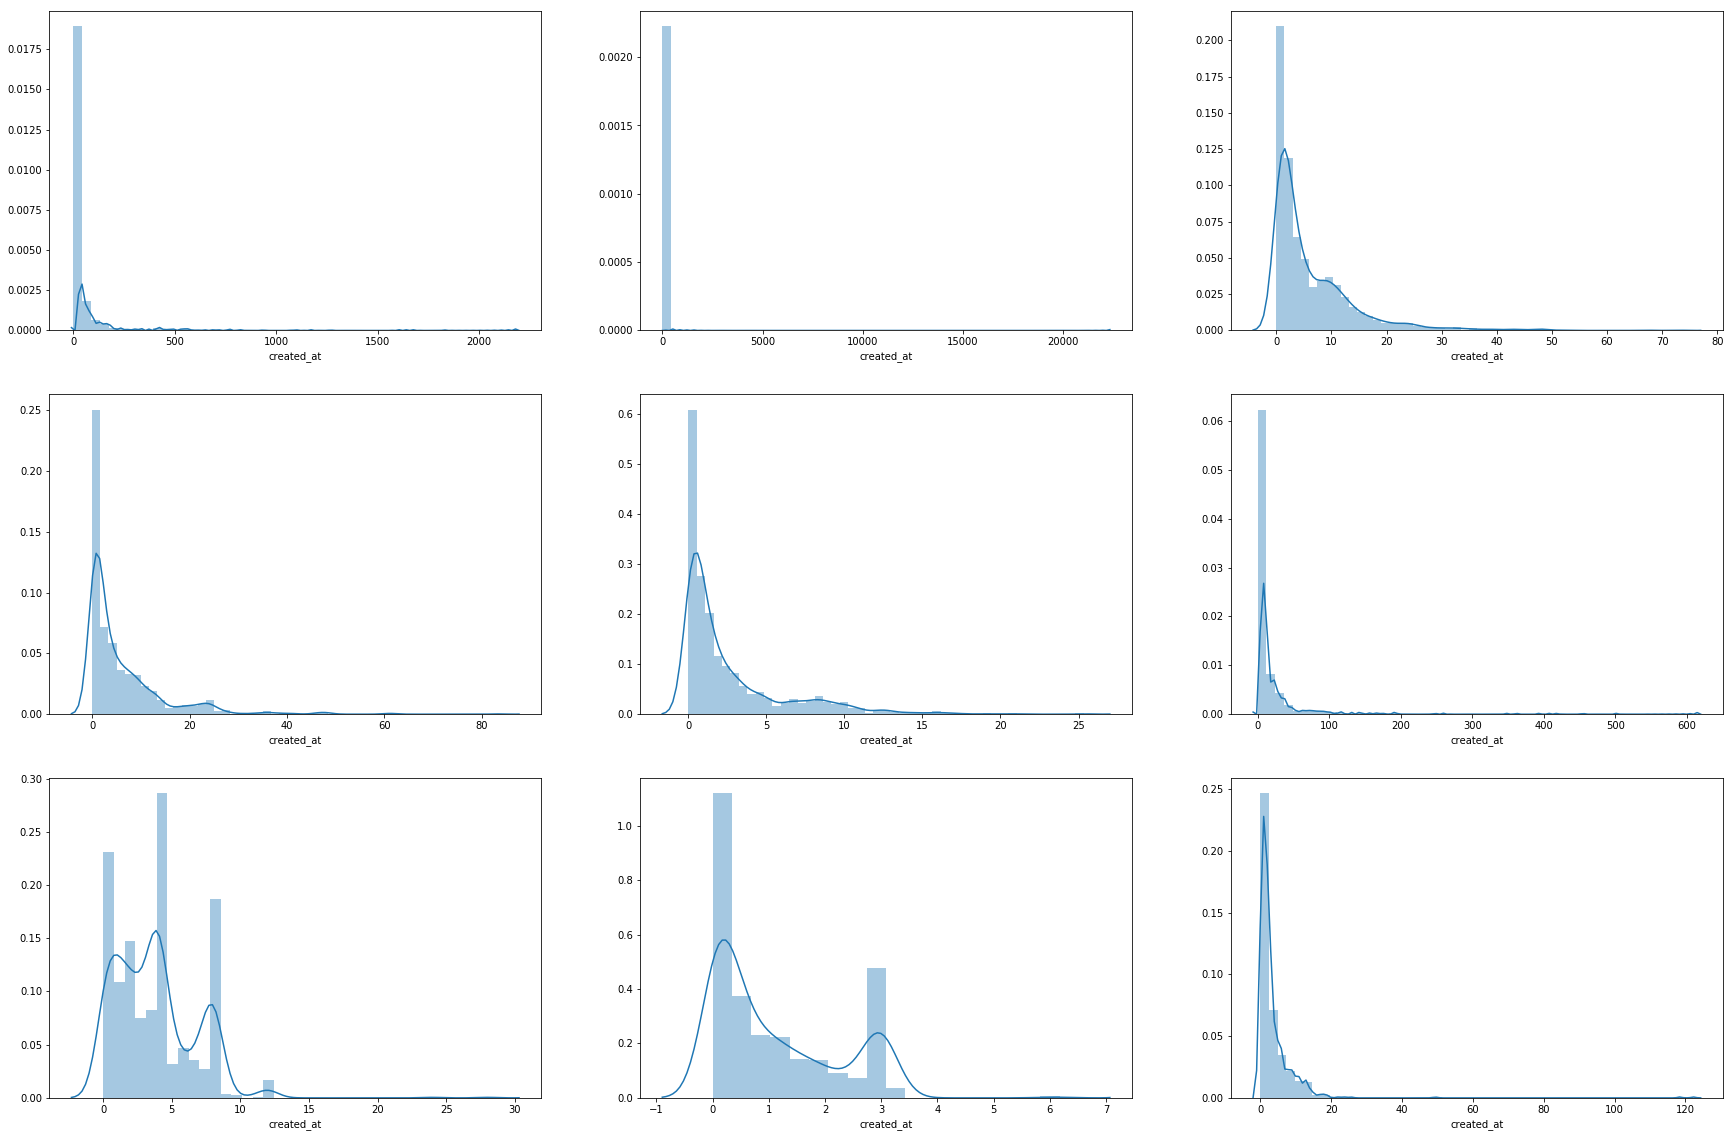

In [66]:
## Duration between two consecutive tweets distribution
fig, ax = plt.subplots(3, 3, figsize=(30,20))
for i in range(3):
    for j in range(3):
        sns.distplot((df[df['handle'] == top_ten_authors[3 * i + j]].sort_values(by = 'created_at').created_at.diff() / np.timedelta64(1, 'h')).dropna(), ax=ax[i][j])

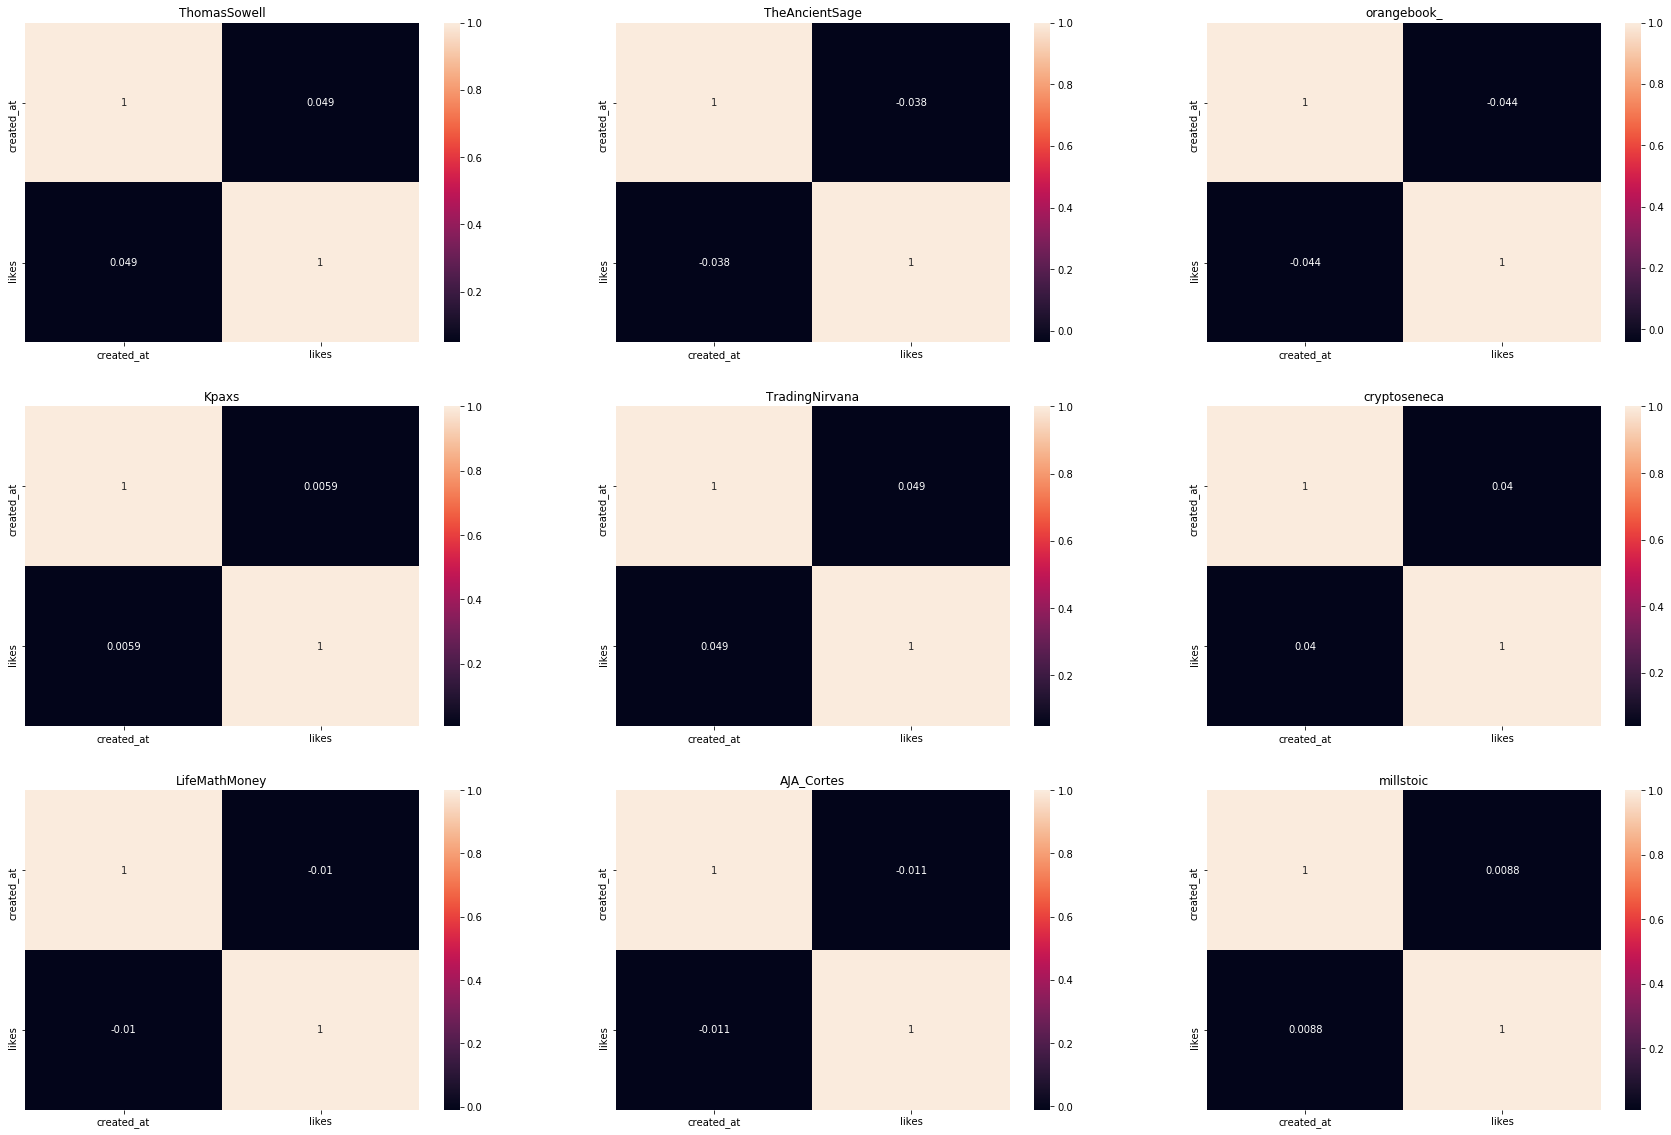

In [67]:
## Correlation between duration between two tweets and difference of likes both of them have. 
fig, ax = plt.subplots(3, 3, figsize=(30,20))
for i in range(3):
    for j in range(3):
        temp = df[df['handle'] == top_ten_authors[3 * i + j]].sort_values(by = 'created_at')[['created_at', 'likes']].diff().dropna()
        sns.heatmap(pd.concat([temp.created_at.dt.seconds, temp.likes], axis=1).corr(), ax=ax[i][j], annot=True).set_title(top_ten_authors[3 * i + j])

** Technically, a negative correlation means smaller the duration, greater the difference between likes. Vice versa for the positive correlation. But most of the correlation is too close to zero. It implies that duration between two tweets cannot influence the likes of the latter one. **

# Analysing the content inside the tweet

* wordcount distribution and correlation with the likes.
* Wordcloud for each author. 
* Understanding what makes some tweets viral and some not so much. 
* Bigrams and trigram analysis of viral tweets. 
* What are the sentiments of tweets. What kind  of sentiments make a tweet viral. 
* variation of author's word count and word cloud with respect to time. 

In [68]:
df['word_count'] = df.tweet_content.str.len()

** Twitter has 280 word limit on a tweet. On 7 November 2017, twitter increased it's character limits from 124-280. It will be interesting to see that change in the dataset ** 

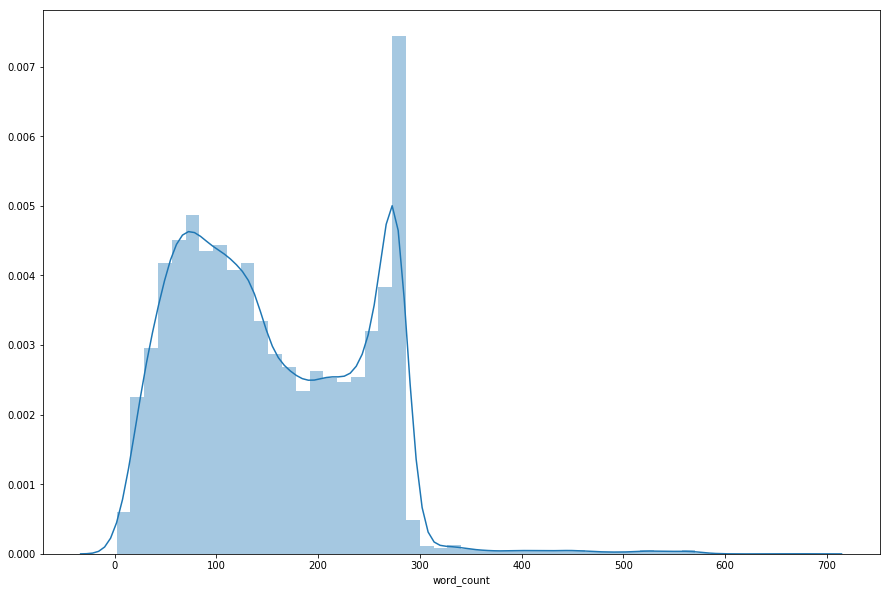

In [69]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot(df.word_count, ax=ax)

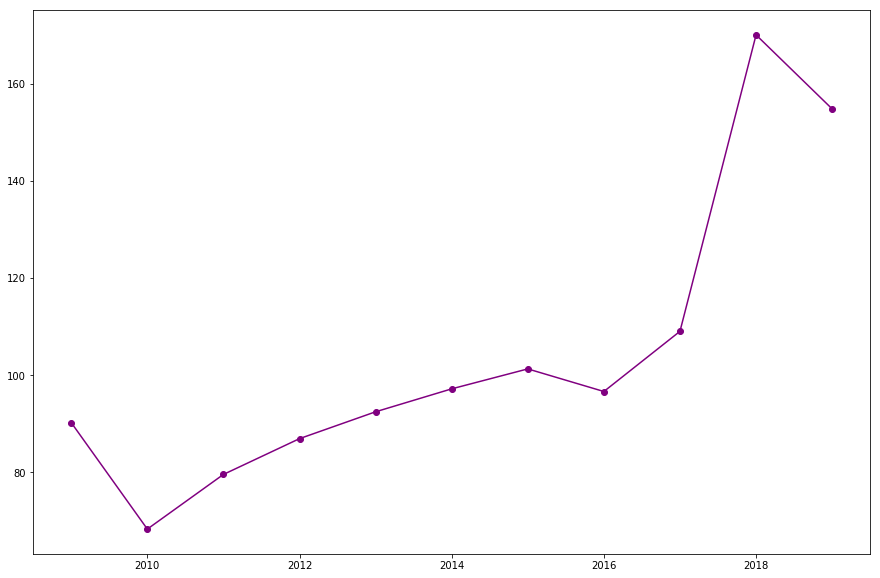

In [70]:
# Create the plot space upon which to plot the data
fig, ax = plt.subplots(figsize=(15, 10))


# Add the x-axis and the y-axis to the plot
ax.plot(np.sort(df.creation_year.unique()),
        df.groupby('creation_year').word_count.mean(), '-o',
        color='purple')

plt.show()

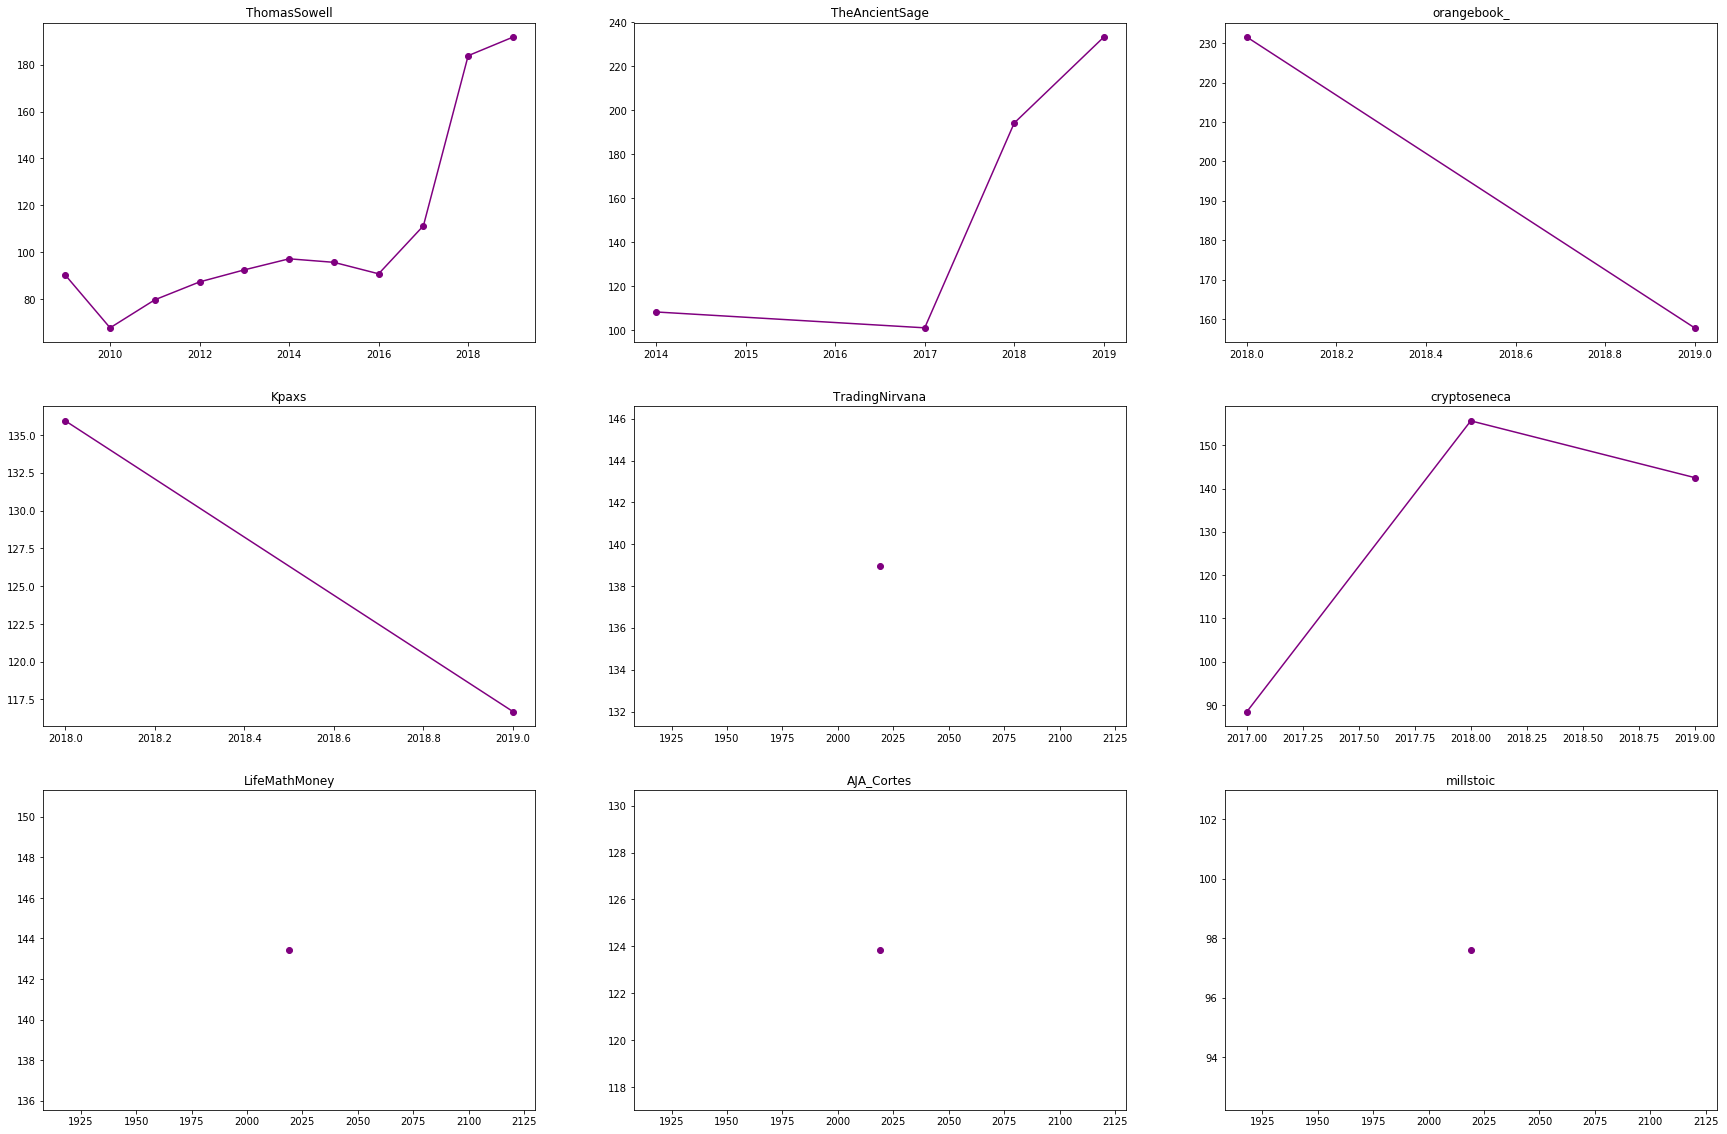

In [71]:
## The red ones are the viral tweets and the blue one is average of likes between two consecutive viral tweets
fig, ax = plt.subplots(3, 3, figsize=(30,20))
for i in range(3):
    for j in range(3):
        ax[i][j].plot(np.sort(df[df.handle == top_ten_authors[3*i + j]].creation_year.unique()), df[df.handle == top_ten_authors[3*i + j]].groupby('creation_year').word_count.mean(), '-o', color='purple')
        ax[i][j].set_title(top_ten_authors[3*i + j])

** It can be easily seen that after 2017, the average tweet length jump drastically **

** Most of the authors has a very little change in word count. Some even has decrease the average word count with respect to time. ** 

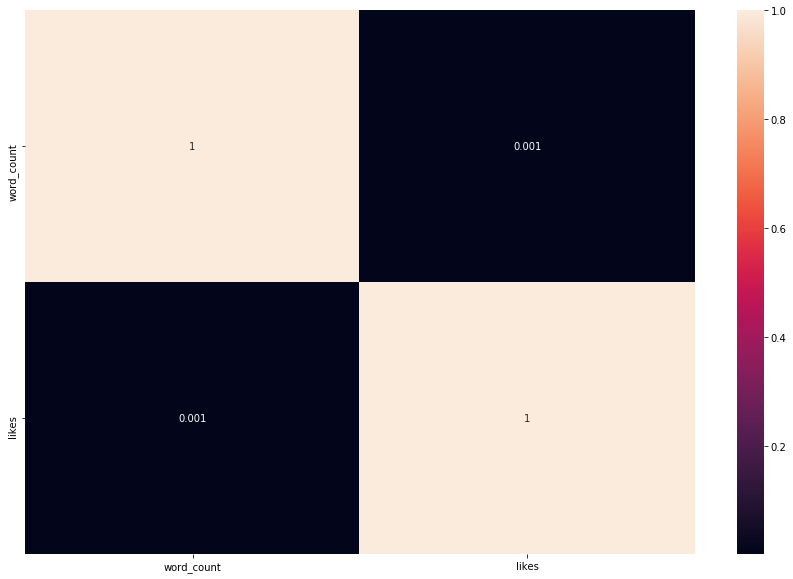

In [72]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df[['word_count', 'likes']].corr(), ax=ax, annot=True)

** Negligible correlation between word count and number of likes. Might be because 280 words are not too much and hence most of the people can read it easily. **

In [73]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [74]:
def plot_wordcloud(text, ax, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0), title = None, title_size=40, image_color=False):
    """
    Function Credit: https://www.kaggle.com/aashita/word-clouds-of-various-shapes
    """
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    mask = mask)
    wordcloud.generate(text)
    
    if image_color:
        image_colors = ImageColorGenerator(mask);
        ax.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        ax.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        ax.imshow(wordcloud);
        ax.set_title(title, fontdict={'size': title_size, 'color': 'green', 
                                  'verticalalignment': 'bottom'})
    ax.axis('off');
        
def plot_the_author(name, ax=plt):
    author_tweets = df[df.handle == name].tweet_content
    plot_wordcloud('\n'.join(author_tweets), max_words=600, max_font_size=120,  title = name + ' tweets', title_size=20, figure_size=(10,12), ax=ax)

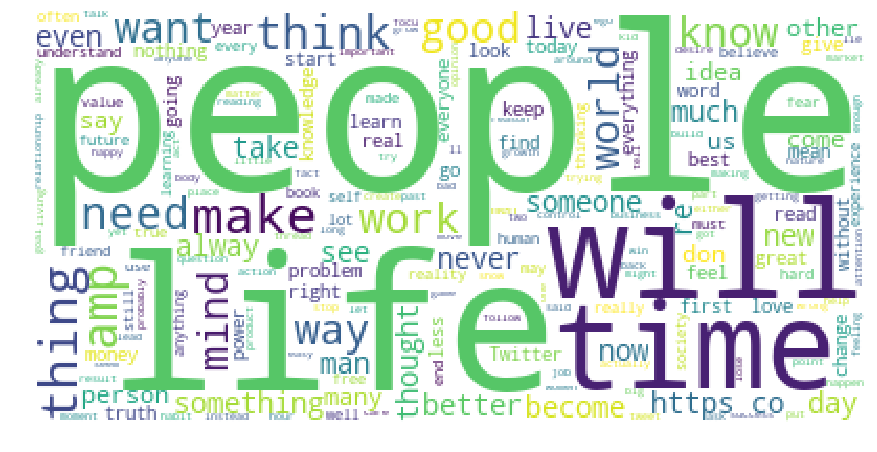

In [75]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_wordcloud('\n'.join(df.tweet_content), ax=ax)

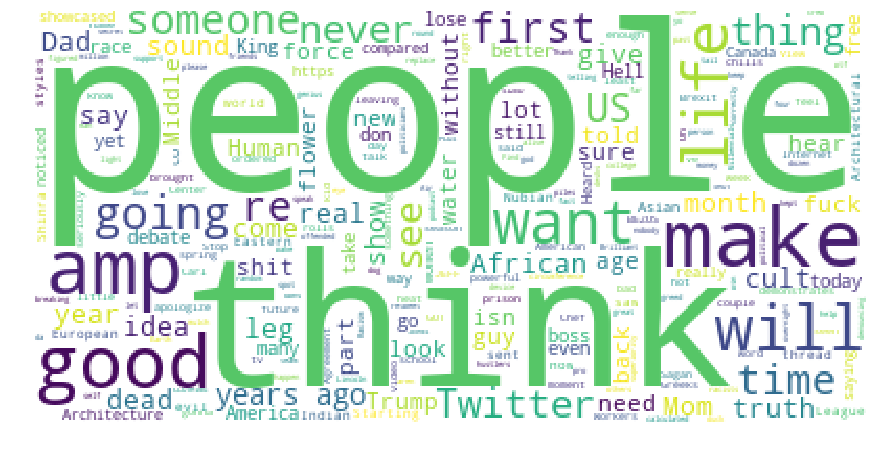

In [76]:
fig, ax = plt.subplots(figsize=(15, 10))
viral_tweets_all = df[(np.abs(stats.zscore(df.likes)) > 3)].tweet_content
plot_wordcloud('\n'.join(viral_tweets_all), ax=ax)

** You might be expecting this because I am. Words like "will", "time", "life", "people", "mind" and many more words which focuses more on individual responsibility are in abundance. **

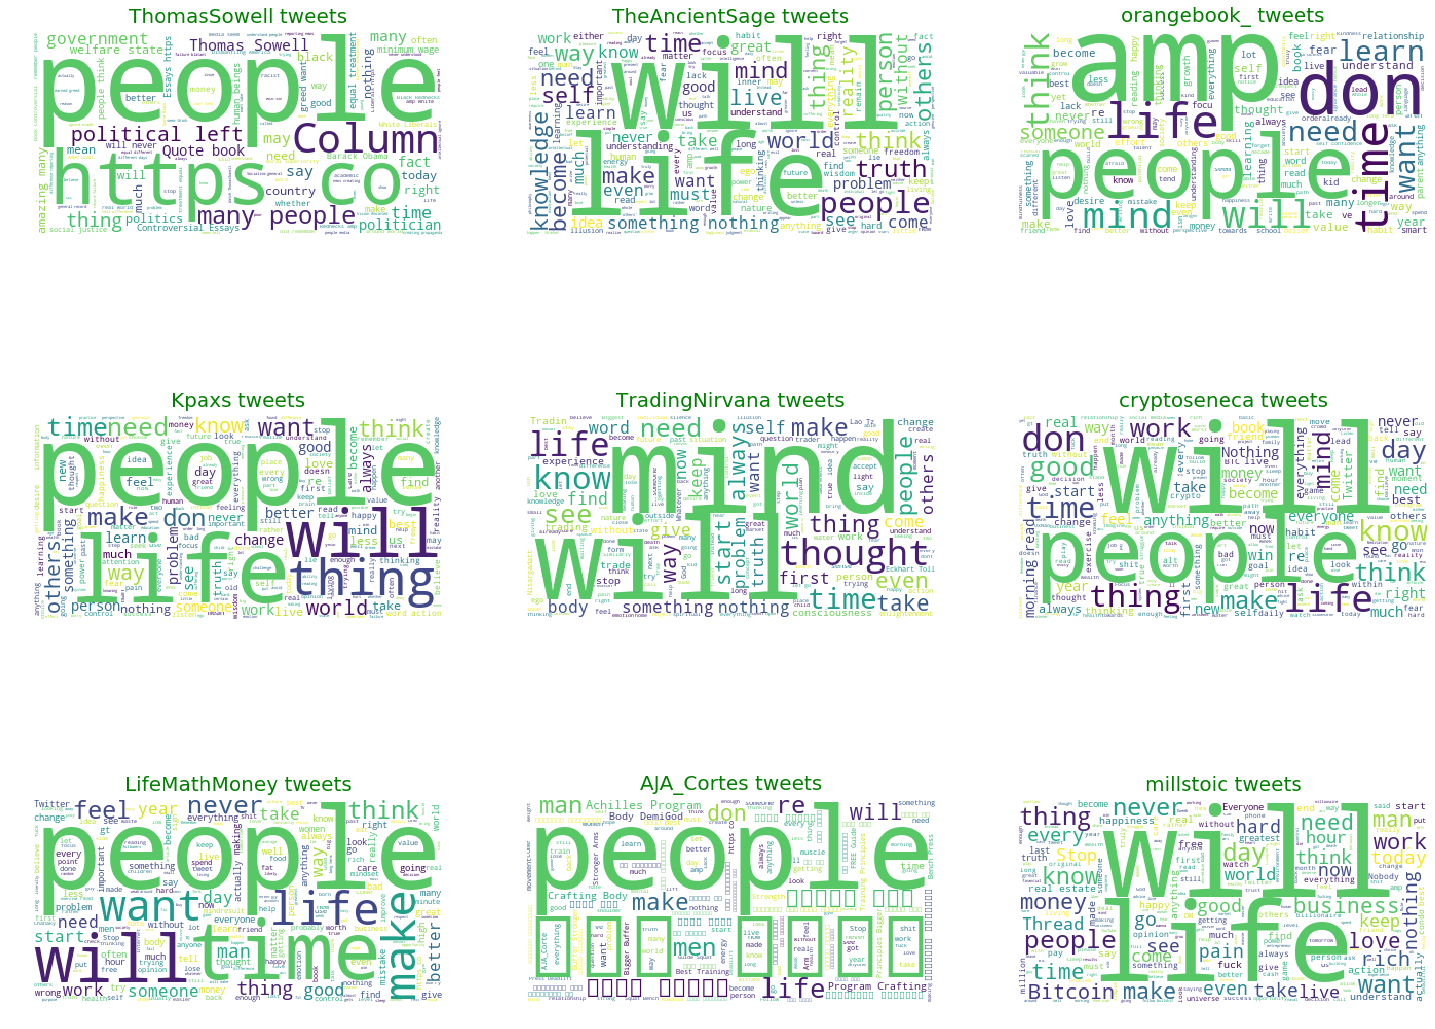

In [77]:
## Correlation between duration between two tweets and difference of likes both of them have. 
fig, ax = plt.subplots(3, 3, figsize=(25,20))
for i in range(3):
    for j in range(3):
        plot_the_author(top_ten_authors[3 * i + j], ax=ax[i][j])

** Aren't all the word clouds seem alike. Most frequent words of all the top 10 authors are almost same. They talk about the same content using different language. This also tells us motivational people (who focuses on individual responsibility) are more of less uses the same formulla to preach. **

** Let's focus on viral tweet's wordcloud now. We are plotting wordcloud of all the viral tweets as well as word cloud of the least liked tweets of the author ** 

In [78]:
def plot_viral_twts_cloud(name, ax):
    author_tweets = df[df.handle == name].tweet_content
    plot_wordcloud('\n'.join(author_tweets), max_words=600, max_font_size=120,  title = name + ' tweets', title_size=20, figure_size=(10,12), ax=ax[0])
    t = df[df['handle'] == name]
    viral_tweets_content = t[(np.abs(stats.zscore(t.likes)) > 3)].tweet_content
    t = df[(df['handle'] == name) & ~((df.creation_year ==2019) & (df.creation_month==9))] # Trying to remove recent tweets
    least_liked_tweets = t.sort_values(by = 'likes').head(10).tweet_content
    plot_wordcloud('\n'.join(viral_tweets_content), max_words=600, max_font_size=120,  title = name + ' viral tweets', title_size=20, figure_size=(10,12), ax=ax[1])
    plot_wordcloud('\n'.join(least_liked_tweets), max_words=600, max_font_size=120,  title = name + ' least liked tweets', title_size=20, figure_size=(10,12), ax=ax[2])

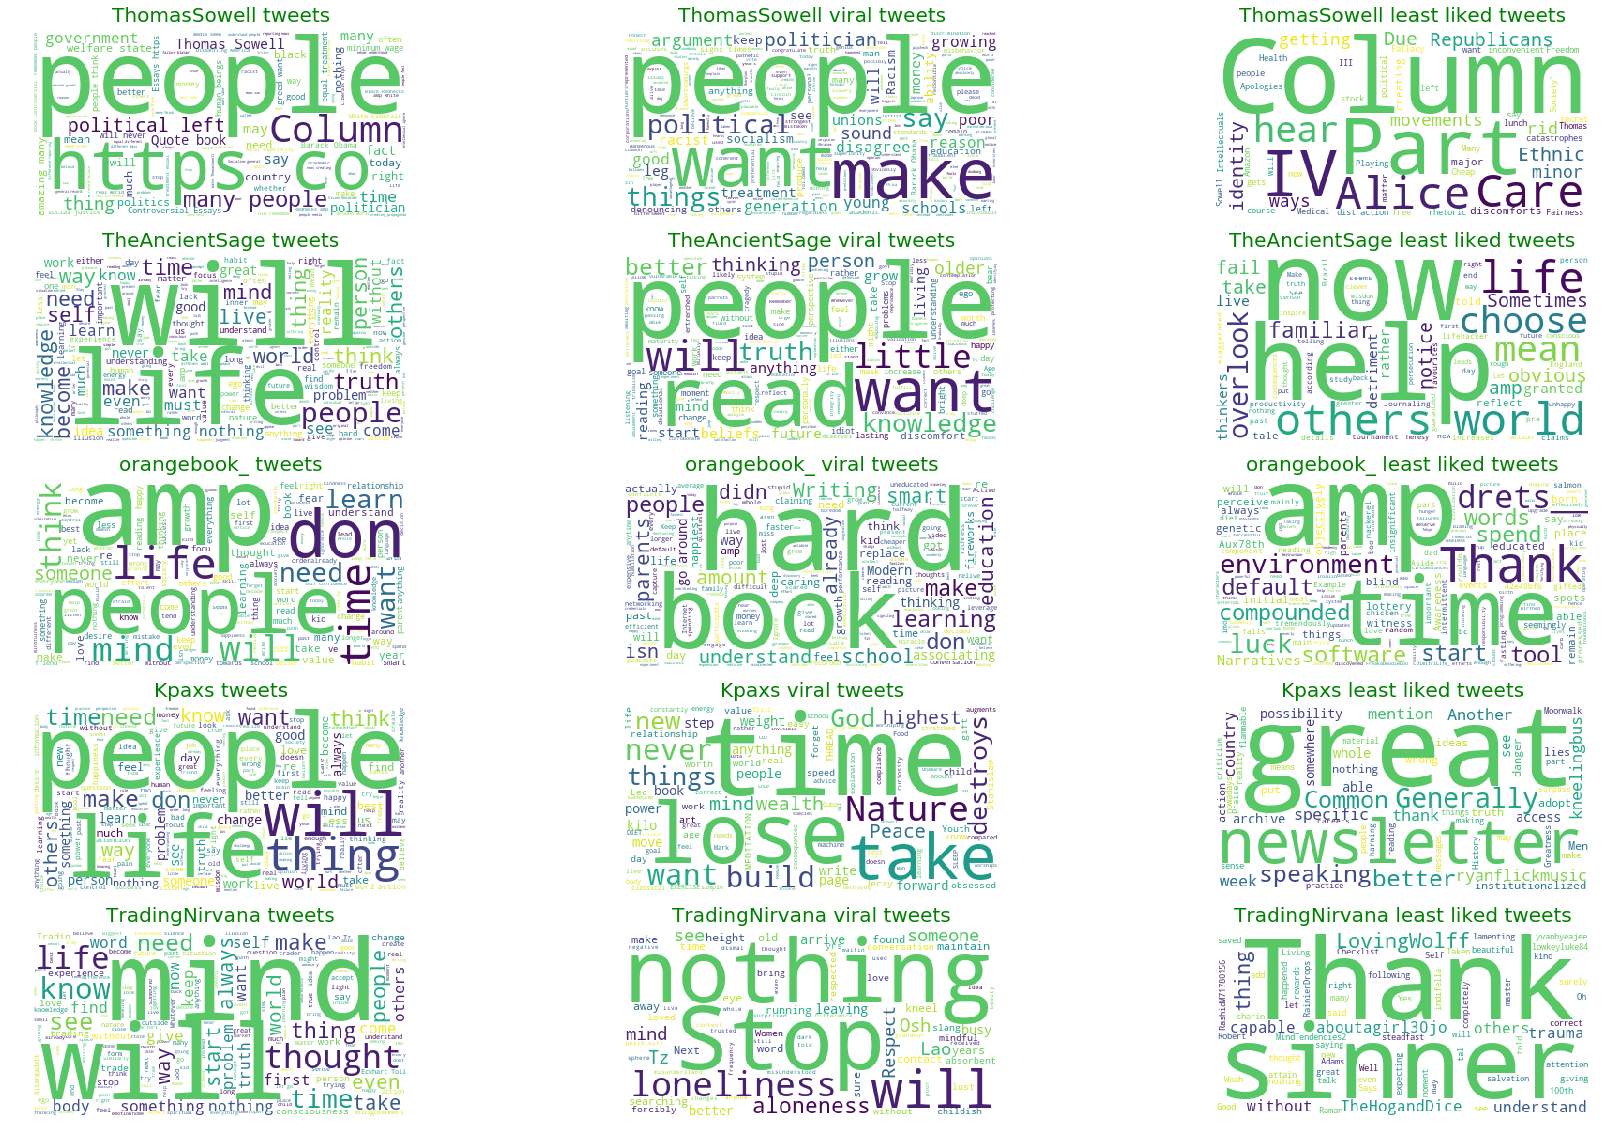

In [79]:
fig, ax = plt.subplots(5, 3, figsize=(30,20))
for i in range(5):
    plot_viral_twts_cloud(top_ten_authors[i], ax[i])

** So many things to unfold. But you can see that words like "political", "unions", "argument" etc political terms helped ThomasSowell getting viral tweets **

** The difference is apparent in a few cases and obsure in some. It is better if you observe them by yourself. Also let me know if you found something interesting about the plot in comments. **

** I'm targeting bigrams and trigrams for analysis the tweets. **

Inspiraton: [Data cleaning, Data Processing & Data Analysis](https://www.kaggle.com/hsankesara/data-cleaning-data-processing-data-analysis)

** Removing Stop words **

In [80]:
import nltk
from tqdm import tqdm
tqdm.pandas()

In [81]:
df['tweet_tokens'] = df['tweet_content'].progress_apply(nltk.word_tokenize)

100%|██████████| 30753/30753 [00:17<00:00, 1726.65it/s]


In [82]:
en_stopwords = set(nltk.corpus.stopwords.words('english'))
df['tweet_tokens'] = df['tweet_tokens'].progress_apply(lambda x: [item for item in x if item not in en_stopwords])

100%|██████████| 30753/30753 [00:00<00:00, 58738.86it/s]


In [83]:
#function to filter for ADJ/NN bigrams
def rightTypes(ngram):
    if '-pron-' in ngram or 't' in ngram:
        return False
    for word in ngram:
        if word in en_stopwords or word.isspace():
            return False
    acceptable_types = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS')
    second_type = ('NN', 'NNS', 'NNP', 'NNPS')
    tags = nltk.pos_tag(ngram)
    if tags[0][1] in acceptable_types and tags[1][1] in second_type:
        return True
    else:
        return False
#filter bigrams
#filtered_bi = bigramFreqTable[bigramFreqTable.bigram.map(lambda x: rightTypes(x))]
#function to filter for trigrams
def rightTypesTri(ngram):
    if '-pron-' in ngram or 't' in ngram:
        return False
    for word in ngram:
        if word in en_stopwords or word.isspace():
            return False
    first_type = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS')
    third_type = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS')
    tags = nltk.pos_tag(ngram)
    if tags[0][1] in first_type and tags[2][1] in third_type:
        return True
    else:
        return False
#filter trigrams
#filtered_tri = trigramFreqTable[trigramFreqTable.trigram.map(lambda x: rightTypesTri(x))]

In [84]:
def get_bigram_trigrams(tokens, title):
    bigrams = nltk.collocations.BigramAssocMeasures()
    trigrams = nltk.collocations.TrigramAssocMeasures()
    bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(tokens)
    trigramFinder = nltk.collocations.TrigramCollocationFinder.from_words(tokens)
    #bigrams
    bigram_freq = bigramFinder.ngram_fd.items()
    bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)
    #trigrams
    trigram_freq = trigramFinder.ngram_fd.items()
    trigramFreqTable = pd.DataFrame(list(trigram_freq), columns=['trigram','freq']).sort_values(by='freq', ascending=False)
    filtered_bi = bigramFreqTable[bigramFreqTable.bigram.map(lambda x: rightTypes(x))]
    filtered_tri = trigramFreqTable[trigramFreqTable.trigram.map(lambda x: rightTypesTri(x))]
    print(title)
    print(filtered_bi.head(20))
    print(filtered_tri.head(20))
    return bigramFinder, trigramFinder, bigrams, trigrams

In [85]:
%time generic_bigrams_finders, generic_trigrams_finders, generic_bigrams, generic_trigrams = get_bigram_trigrams(np.concatenate(df.tweet_tokens.to_list()), title="Extracting generic Bi/Tri-grams")

Extracting generic Bi/Tri-grams
                    bigram  freq
105290              (Q, >)   836
105294             (/Q, >)   836
105293             (<, /Q)   836
105289              (<, Q)   836
2465              (Don, ’)   342
294             (@, naval)   250
214798            (@, shl)   206
3024                (”, —)   201
213515     (@, DrRalphNap)   177
14586       (many, people)   169
36482      (@, AJA_Cortes)   157
11869      (@, EdLatimore)   155
24876       (Most, people)   152
10518         (@, andjomc)   130
3738                (”, “)   122
2256       (social, media)   117
34800    (@, DeeperThrill)   108
602           (long, term)    96
93916          (𝐅𝐚𝐭, 𝐋𝐨𝐬𝐬)    88
38217   (@, LifeMathMoney)    87
                              trigram  freq
138168                     (<, /Q, >)   836
138163                      (<, Q, >)   836
441                     (@, naval, @)    76
122339                (𝐆𝐔𝐈𝐃𝐄, :, 𝐓𝐡𝐞)    66
139160                     (/Q, >, @)    61
122888     

** Let me clear some things here. &lt;Q> and &lt;/Q> are the tags I have used when a author retweets a tweet with a comment. The author's comment is followed by &lt;Q> tag and then the content of the retweet comes which is followed by &lt;/Q>. **

** Most frequent bigrams are just @ <author's name>. That is a let down ** 

** Also trigrams has most of the trigrams regarding workout which might have come from a same twitter accout. That is why individual analysis is necessary. 

** Let's analysis bi/tri grams of top 5 authors **

In [86]:
top_five_author_bigram_finder = [None for i in range(5)]
top_five_author_trigram_finder = [None for i in range(5)]
top_five_author_bigrams = [None for i in range(5)]
top_five_author_trigrams = [None for i in range(5)]
for i in range(5):
     top_five_author_bigram_finder[i], top_five_author_trigram_finder[i], top_five_author_bigrams[i], top_five_author_trigrams[i] = get_bigram_trigrams(np.concatenate(df[df.handle == top_ten_authors[i]].tweet_tokens.to_list()), title=top_ten_authors[i])

ThomasSowell
                       bigram  freq
252            (many, people)    81
5490         (Thomas, Sowell)    43
710             (Quote, book)    37
611          (welfare, state)    36
2507                   (”, “)    35
2402  (Controversial, Essays)    26
135        (equal, treatment)    23
428           (human, beings)    23
2245        (@, ThomasSowell)    22
2659          (Barack, Obama)    22
2342          (minimum, wage)    22
2401    (book, Controversial)    20
1594     (moral, superiority)    19
2461        (Black, Rednecks)    18
2466        (White, Liberals)    18
754        (failure, blatant)    16
753         (record, failure)    16
758           (ignore, evade)    16
2460           (Quote, Black)    16
1853             (want, take)    16
                               trigram  freq
2674                (Essays, :, https)    24
2672     (book, Controversial, Essays)    20
2671      (Quote, book, Controversial)    18
2751              (Liberals, :, https)    18
2748  

** Let's checkout bi/tri-grams of all the viral tweets ** 

In [87]:
top_five_author_bigram_finder_v = [None for i in range(5)]
top_five_author_trigram_finder_v = [None for i in range(5)]
top_five_author_bigrams_v = [None for i in range(5)]
top_five_author_trigrams_v = [None for i in range(5)]
for i in range(5):
    t = df[df['handle'] == top_ten_authors[i]]
    top_five_author_bigram_finder_v[i], top_five_author_trigram_finder_v[i], top_five_author_bigrams_v[i], top_five_author_trigrams_v[i] = get_bigram_trigrams(np.concatenate(t[(np.abs(stats.zscore(t.likes)) > 3)].tweet_tokens.to_list()), title=top_ten_authors[i])

ThomasSowell
                        bigram  freq
63             (Barack, Obama)     3
304                (tail, leg)     2
208  (preferential, treatment)     2
211         (equal, treatment)     2
148            (life, support)     2
149               (support, —)     2
77             (—, regardless)     2
76                 (detail, —)     2
198              (common, man)     2
196              (left, voice)     2
393             (many, people)     2
181      (bittersweet, things)     2
383               (want, help)     2
184           (old, realizing)     2
191       (political, leftist)     2
2                  (want, see)     2
13              (low, schools)     2
72              (good, people)     2
35       (individuals, groups)     2
34       (number, individuals)     2
                               trigram  freq
72              (ability, say, things)     3
162                   (—, kept, alive)     2
158                    (dead, ,, life)     2
160                 (life, sup

** Viral tweets usually do not have same bigrams/trigrams which makes sense as they are far lesser in number that chance of such collision reduces drastically. Plus the viral tweet is something which appeals to not only your niche group of followers but also a general crowd. **

** Let's Analyse the bigrams and trigrams now. Let's now find the bigrams and trigrams with highest pointwise mututal information. The main intuition is that it measures how much more likely the words co-occur than if they were independent. However, it is very sensitive to rare combination of words.**

In [88]:
def get_pointwise_mi_scores(bigramFinder, trigramFinder, bigrams, trigrams, title):
    #filter for only those with more than 20 occurences
    bigramFinder.apply_freq_filter(20)
    trigramFinder.apply_freq_filter(20)
    bigramPMITable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.pmi)), columns=['bigram','PMI']).sort_values(by='PMI', ascending=False)
    trigramPMITable = pd.DataFrame(list(trigramFinder.score_ngrams(trigrams.pmi)), columns=['trigram','PMI']).sort_values(by='PMI', ascending=False)
    print('Exploring Point wise Mututal Information in bigrams and trigrams of ' + title)
    print('-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print('-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print(bigramPMITable.head(10))
    print('-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print(trigramPMITable.head(10))
    print('-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    return bigramPMITable, trigramPMITable

In [89]:
_, __ = get_pointwise_mi_scores(generic_bigrams_finders, generic_trigrams_finders, generic_bigrams, generic_trigrams, "all the tweets")

Exploring Point wise Mututal Information in bigrams and trigrams of all the tweets
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                    bigram        PMI
0  (Controversial, Essays)  14.474140
1                   (⠀, ⠀)  14.451420
2        (Silicon, Valley)  14.322137
3           (𝐁𝐄𝐍𝐂𝐇, 𝐏𝐑𝐄𝐒𝐒)  14.274831
4             (𝐏𝐑𝐄𝐒𝐒, 𝐚𝐧𝐝)  14.274831
5          (𝐚𝐧𝐝, 𝐃𝐄𝐀𝐃𝐋𝐈𝐅𝐓)  14.274831
6          (Eckhart, Toll)  14.229028
7          (Barack, Obama)  13.981100
8         (United, States)  13.847834
9                 (𝐍𝐨, 𝐁𝐒)  13.802763
---------------------------------------------------------------------------------------------------------------------------------------------------

In [90]:
for i in range(5):
    _, __ = get_pointwise_mi_scores(top_five_author_bigram_finder[i], top_five_author_trigram_finder[i], top_five_author_bigrams[i], top_five_author_trigrams[i], top_ten_authors[i] + "\'s tweets")

Exploring Point wise Mututal Information in bigrams and trigrams of ThomasSowell's tweets
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                    bigram        PMI
0                 (amp, ;)  10.494332
1                 (&, amp)  10.301687
2          (minimum, wage)  10.298957
3  (Controversial, Essays)  10.186209
4          (Barack, Obama)  10.028668
5        (@, ThomasSowell)   9.842255
6         (Thomas, Sowell)   9.209626
7         (welfare, state)   9.203265
8          (human, beings)   9.181392
9    (book, Controversial)   8.753250
--------------------------------------------------------------------------------------------------------------------------------------------

** You may have seen few tuples which qualitaatively convey no information but have highest correlation/mutual information. To find out significance of each tuple, we'll use t score and score the bi and tri grams **

In [91]:
def get_t_scores( bigramFinder, trigramFinder, bigrams, trigrams, title):
    bigramTtable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.student_t)), columns=['bigram','t']).sort_values(by='t', ascending=False)
    trigramTtable = pd.DataFrame(list(trigramFinder.score_ngrams(trigrams.student_t)), columns=['trigram','t']).sort_values(by='t', ascending=False)
    #filters
    filteredT_bi = bigramTtable[bigramTtable.bigram.map(lambda x: rightTypes(x))]
    filteredT_tri = trigramTtable[trigramTtable.trigram.map(lambda x: rightTypesTri(x))]
    print('Exploring t scores between the words in bigrams and trigrams of ' + title)
    print('-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print('-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print(filteredT_bi.head(10))
    print('-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    print(filteredT_tri.head(10))
    print('-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------')
    return filteredT_bi, filteredT_tri

In [92]:
_, __ = get_t_scores(generic_bigrams_finders, generic_trigrams_finders, generic_bigrams, generic_trigrams, "all the tweets")

Exploring t scores between the words in bigrams and trigrams of all the tweets
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
             bigram          t
6           (/Q, >)  28.834992
7           (<, /Q)  28.834992
8            (<, Q)  28.831886
9            (Q, >)  28.831886
27         (Don, ’)  18.276993
38       (@, naval)  15.648897
47         (@, shl)  14.205200
50           (”, —)  13.982895
57  (@, DrRalphNap)  13.167410
65   (many, people)  12.534426
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
               trigram          t
1           (<, /Q

In [93]:
for i in range(5):
    _, __ = get_t_scores(top_five_author_bigram_finder[i], top_five_author_trigram_finder[i], top_five_author_bigrams[i], top_five_author_trigrams[i], top_ten_authors[i] + "\'s tweets")

Exploring t scores between the words in bigrams and trigrams of ThomasSowell's tweets
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                     bigram         t
6            (many, people)  8.594319
13         (Thomas, Sowell)  6.546363
17            (Quote, book)  6.055800
18         (welfare, state)  5.989821
27                   (”, “)  5.612246
35  (Controversial, Essays)  5.094643
40          (human, beings)  4.787571
43       (equal, treatment)  4.772910
45          (minimum, wage)  4.686693
46          (Barack, Obama)  4.685925
------------------------------------------------------------------------------------------------------------------------------------------------

** I believe bigrams and the trigrams are a great window to get gist of an author's work. If you want to know more about more authors, just run your copy  and check them out. ** 

** Let's move forward to sentiment analysis. The last but not the least fascinating topic of the notebook.  I'm going to use [TextBlob](https://github.com/sloria/TextBlob) library which contains state-of-the NLP methods and is very easy to use.**

* Distribution of subjectivity and polarity. 
* The correlation between subjectivity, polarity and likes. 
* Author wise subjectivity and polarity analysis. 
* Variation of polarity and subjectivity over the time. Both holistic as well as individual analysis. 

In [94]:
from textblob import TextBlob

In [95]:
def  get_sentiments(text):
    s = TextBlob(text).sentiment
    return  s.polarity ,s.subjectivity

In [96]:
df['polarity'], df['subjectivity'] = zip(*df['tweet_content'].progress_apply(get_sentiments))

100%|██████████| 30753/30753 [00:28<00:00, 1094.17it/s]


** Here polarity is the sentiment of a tweet. It is float which lies between [-1,1] where -1 is for completely negative tweet and 1 for totally positive tweet. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1]. **

In [97]:
df.head()

author_name          created_at handle  likes  retweets  \
0       Naval 2019-08-07 22:36:56  naval   7566      1498   
1       Naval 2019-08-07 05:00:38  naval  21886      5984   
2       Naval 2019-08-07 04:52:33  naval   6462      1266   
3       Naval 2019-08-06 08:35:26  naval    466        61   
4       Naval 2019-08-06 07:33:20  naval   3971       906   

                                       tweet_content  creation_month  \
0  Unresolved thoughts, prematurely pushed out of...               8   
1  The modern mind is overstimulated and the mode...               8   
2  The Lindy Effect for startups:\n\nThe longer y...               8   
3               @orangebook_ This was a good tweet.                8   
4  Social media lowers the cost of raising &amp; ...               8   

   creation_day  creation_year  creation_hour  word_count  \
0             7           2019             22         183   
1             7           2019              5         148   
2             7           2019              4         119   
3             6           2019              8          36   
4             6           2019              7         287   

                                        tweet_tokens  polarity  subjectivity  
0  [Unresolved, thoughts, ,, prematurely, pushed,...  0.000000      0.275000  
1  [The, modern, mind, overstimulated, modern, bo...  0.200000      0.300000  
2  [The, Lindy, Effect, startups, :, The, longer,...  0.250000      0.750000  
3             [@, orangebook_, This, good, tweet, .]  0.700000      0.600000  
4  [Social, media, lowers, cost, raising, &, amp,... -0.016667      0.441667

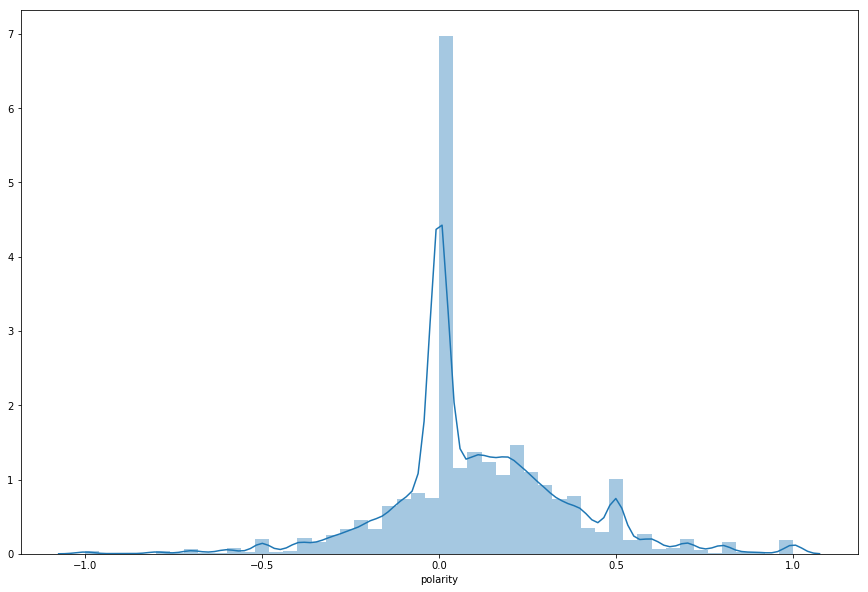

In [98]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot(df.polarity, ax=ax)

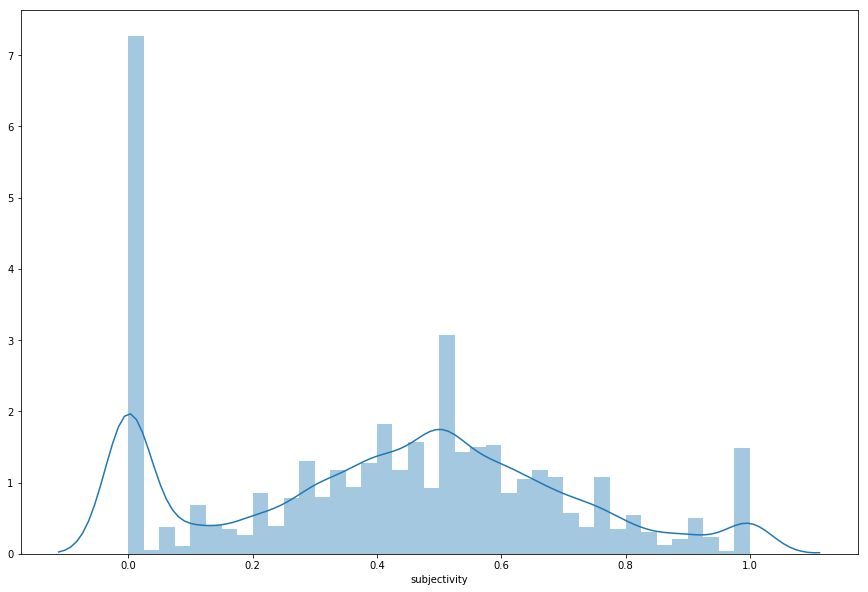

In [99]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot(df.subjectivity, ax=ax)

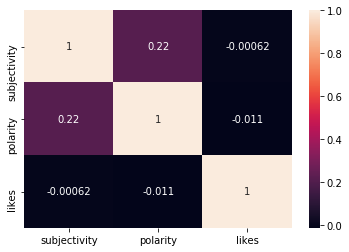

In [100]:
sns.heatmap(df[['subjectivity', 'polarity', 'likes']].corr(), annot=True)

** Likes has no correlation with the polarity/subjectivity and likes. Polarity and subjectivity has some positive correlation. **

In [101]:
for author in top_ten_authors:
    print("Mean Polarity of "+ author + " is " + str(df[df['handle'] == author].polarity.mean()) + ' and standard deviation is ' + str(df[df['handle'] == author].polarity.std()))

Mean Polarity of ThomasSowell is 0.06132091555119209 and standard deviation is 0.22747806547705687
Mean Polarity of TheAncientSage is 0.10663492127730825 and standard deviation is 0.23909019035537318
Mean Polarity of orangebook_ is 0.11984489672788605 and standard deviation is 0.2520322236606769
Mean Polarity of Kpaxs is 0.12393798913383662 and standard deviation is 0.2682336818740184
Mean Polarity of TradingNirvana is 0.11179865953320298 and standard deviation is 0.25869951164944793
Mean Polarity of cryptoseneca is 0.10108437199921541 and standard deviation is 0.2548296761535509
Mean Polarity of LifeMathMoney is 0.08237704200985327 and standard deviation is 0.265727747314089
Mean Polarity of AJA_Cortes is 0.08219915053640674 and standard deviation is 0.23835909131461105
Mean Polarity of millstoic is 0.10486315861582257 and standard deviation is 0.27378573222532315
Mean Polarity of TheChuChu_ is 0.10300126657935377 and standard deviation is 0.24212874509357762


In [102]:
for author in top_ten_authors:
    print("Mean subjectivity of "+ author +  " is " + str(df[df['handle'] == author].subjectivity.mean())  + ' and standard deviation is ' + str(df[df['handle'] == author].subjectivity.std()))

Mean subjectivity of ThomasSowell is 0.38840893968082024 and standard deviation is 0.2798299485819792
Mean subjectivity of TheAncientSage is 0.48896639463003155 and standard deviation is 0.24481261460275516
Mean subjectivity of orangebook_ is 0.4613889569587052 and standard deviation is 0.25178289374924284
Mean subjectivity of Kpaxs is 0.41168451885391033 and standard deviation is 0.2989066351791656
Mean subjectivity of TradingNirvana is 0.4124533857908621 and standard deviation is 0.2895013754491463
Mean subjectivity of cryptoseneca is 0.4222547965125825 and standard deviation is 0.27851379067732673
Mean subjectivity of LifeMathMoney is 0.4151260661077609 and standard deviation is 0.2793390103593345
Mean subjectivity of AJA_Cortes is 0.2992958815760177 and standard deviation is 0.3027947235842459
Mean subjectivity of millstoic is 0.3524153775287656 and standard deviation is 0.3262424935556483
Mean subjectivity of TheChuChu_ is 0.4412729070092164 and standard deviation is 0.25227112145

** The standard deviation of polarity and subjectivity of each author from top 10 authors are close.**

# The End

I tried to understand every aspect of the tweets and along the way discovered many surprising results. I hope that you like this notebook. Feel free to copy and edit it for your own exploration.  

Thanks for reading this kernel. If you have any question, advice or doubt, please write it in the comments. If you like the kernel, Please leave an upvote. 

## Contact Me

[<img src="http://i.imgur.com/0o48UoR.png" width="35">](https://github.com/Hsankesara/)    [<img src="https://i.imgur.com/0IdggSZ.png" width="35">](https://www.linkedin.com/in/heet-sankesara-72383a152/)     [<img src="http://i.imgur.com/tXSoThF.png" width="35">](https://twitter.com/TheSankesara)   [<img src="https://loading.io/s/icon/vzeour.svg" width="35">](https://www.kaggle.com/hsankesara) [<img src="https://image.flaticon.com/icons/svg/2111/2111505.svg" width="35">](https://medium.com/@heetsankesara3)